## Opening the Brazilian Census

The coding below shows how to open the microdata from [Censo IBGE](https://censo2010.ibge.gov.br/), and also to present the different datasets. Read the medium article to complement your understanding and make things clear.  

First I tried the [code](https://medium.com/senior/ibge-parser-um-pacote-em-python-para-leitura-de-microdados-de-censo-do-ibge-8590b8c10096) below, but it did not work for me.

In [1]:
'''
from ibgeparser.microdados import Microdados
from ibgeparser.enums import Anos, Estados, Modalidades

if __name__ == "__main__":
    # utiliza os enums para selecionar os dados desejados
    ano = Anos.DEZ
    estados = [Estados.PERNAMBUCO]
    modalidades = [Modalidades.DOMICILIOS]

    # instancia a classe
    ibgeparser = Microdados()
    # obter os dados
    ibgeparser.obter_dados_ibge(ano, estados, modalidades)
'''

'\nfrom ibgeparser.microdados import Microdados\nfrom ibgeparser.enums import Anos, Estados, Modalidades\n\nif __name__ == "__main__":\n    # utiliza os enums para selecionar os dados desejados\n    ano = Anos.DEZ\n    estados = [Estados.PERNAMBUCO]\n    modalidades = [Modalidades.DOMICILIOS]\n\n    # instancia a classe\n    ibgeparser = Microdados()\n    # obter os dados\n    ibgeparser.obter_dados_ibge(ano, estados, modalidades)\n'

In [2]:
#Before trying the code above, there's the need to install the package, import it, and also import pandas, so:
#pip install ibge-parser
#import ibgeparser
#import pandas as pd

Then, I applied similar steps I had used before to open [PNAD](https://medium.com/data-hackers/microdados-em-python-um-pacote-para-ler-dados-da-pnad-e-pof-e254cf18477d) for Censo 2010, which is on my [GitHub](https://github.com/andreluizcoelho/usefulcodes/blob/main/openingPNADdata.ipynb).

In [3]:
import pandas as pd

If you want to download the microdata from [Censo 2010](https://www.ibge.gov.br/estatisticas/sociais/populacao/9662-censo-demografico-2000.html?=&t=microdados).
The documentation comes from [here](https://ftp.ibge.gov.br/Censos/Censo_Demografico_2010/Resultados_Gerais_da_Amostra/Microdados/Documentacao.zip).
There are 4 txt files households, emigration, mortality and people (domicílios, emigração, mortalidade e pessoas).
I'm using 'Amostra_Domicilios_26.txt', which is the data for the households, for the state of Pernambuco; any state can be [downloaded](https://www.ibge.gov.br/estatisticas/sociais/populacao/9662-censo-demografico-2000.html?=&t=microdados).

In [4]:
ibgecenso2010domicilios = pd.read_fwf('Amostra_Domicilios_26.txt', header=None, dtype=str)
ibgecenso2010domicilios

,0
0,2600054260005400300100002854011999710999465520...
1,2600054260005400300100010543008762192738474120...
2,2600054260005400300100010920005174368011342820...
3,2600054260005400300100024826010333808196097520...
4,2600054260005400300100025720008740301064770320...
...,...
253672,2616506261650600100106155650006328868388134120...
253673,2616506261650600100106167846005547842334352920...
253674,2616506261650600100106169168002048299343449520...
253675,2616506261650600100106173494006557001025964620...


In [5]:
#Not very nice to read the data. So, I'll use 'width'.

The width equals the numbers from the INT + DEC column from 'Layout_Amostra_Microdados.xls' on the 'DOMI' tab, this xls file can be downloaded from 
this direct [link](https://ftp.ibge.gov.br/Censos/Censo_Demografico_2010/Resultados_Gerais_da_Amostra/Microdados/Documentacao.zip). Most of the DEC column is blank, that's why there are only very few numbers that were added with the numbers from the INT column. 

In [6]:
width = [2,5,13,8,3+13,1,2,3,2,1,2,2,1,6,4+5,1,2,2+1,2,2+1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,
         7,5+5,6+2,4+5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [7]:
ibgecenso2010domiciliospe = pd.read_fwf('Amostra_Domicilios_26.txt', widths=width, header=None, dtype=str)

In [8]:
ibgecenso2010domiciliospe.shape

(253677, 76)

In [9]:
ibgecenso2010domiciliospe.head(3)

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,26,00054,2600054003001,00002854,0119997109994655,2,05,017,11,1,...,2,2,2,2,2,2,2,2,2,1
1,26,00054,2600054003001,00010543,0087621927384741,2,05,017,11,1,...,2,2,2,2,2,2,2,2,2,1
2,26,00054,2600054003001,00010920,0051743680113428,2,05,017,11,1,...,2,2,2,2,2,2,2,2,2,1


In [10]:
#The columns need to be renamed, the variable names comes from the same 'Layout_Amostra_Microdados.xls' file.

In [11]:
ibgecenso2010domiciliospe.columns=['V0001','V0002','V0011','V0300','V0010','V1001','V1002','V1003','V1004','V1006','V4001','V4002',
'V0201','V2011','V2012','V0202','V0203','V6203','V0204','V6204','V0205','V0206','V0207','V0208','V0209','V0210','V0211','V0212',
'V0213','V0214','V0215','V0216','V0217','V0218','V0219','V0220','V0221','V0222','V0301','V0401','V0402','V0701','V6529','V6530',
'V6531','V6532','V6600','V6210','M0201','M2011','M0202','M0203','M0204','M0205','M0206','M0207','M0208','M0209','M0210','M0211',
'M0212','M0213','M0214','M0215','M0216','M0217','M0218','M0219','M0220','M0221','M0222','M0301','M0401','M0402','M0701','V1005']

In [12]:
ibgecenso2010domiciliospe

,V0001,V0002,V0011,V0300,V0010,V1001,V1002,V1003,V1004,V1006,...,M0218,M0219,M0220,M0221,M0222,M0301,M0401,M0402,M0701,V1005
0,26,00054,2600054003001,00002854,0119997109994655,2,05,017,11,1,...,2,2,2,2,2,2,2,2,2,1
1,26,00054,2600054003001,00010543,0087621927384741,2,05,017,11,1,...,2,2,2,2,2,2,2,2,2,1
2,26,00054,2600054003001,00010920,0051743680113428,2,05,017,11,1,...,2,2,2,2,2,2,2,2,2,1
3,26,00054,2600054003001,00024826,0103338081960975,2,05,017,11,1,...,2,2,2,2,2,2,2,2,2,1
4,26,00054,2600054003001,00025720,0087403010647703,2,05,017,11,1,...,2,2,2,2,2,2,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253672,26,16506,2616506001001,06155650,0063288683881341,2,04,015,00,1,...,2,2,2,2,2,2,2,2,2,1
253673,26,16506,2616506001001,06167846,0055478423343529,2,04,015,00,1,...,2,2,2,2,2,2,2,2,2,1
253674,26,16506,2616506001001,06169168,0020482993434495,2,04,015,00,1,...,2,2,2,2,2,2,2,2,2,1
253675,26,16506,2616506001001,06173494,0065570010259646,2,04,015,00,1,...,2,2,2,2,2,2,2,2,2,1


In [13]:
pd.set_option('display.max_columns',None)

In [14]:
ibgecenso2010domiciliospe

,V0001,V0002,V0011,V0300,V0010,V1001,V1002,V1003,V1004,V1006,V4001,V4002,V0201,V2011,V2012,V0202,V0203,V6203,V0204,V6204,V0205,V0206,V0207,V0208,V0209,V0210,V0211,V0212,V0213,V0214,V0215,V0216,V0217,V0218,V0219,V0220,V0221,V0222,V0301,V0401,V0402,V0701,V6529,V6530,V6531,V6532,V6600,V6210,M0201,M2011,M0202,M0203,M0204,M0205,M0206,M0207,M0208,M0209,M0210,M0211,M0212,M0213,M0214,M0215,M0216,M0217,M0218,M0219,M0220,M0221,M0222,M0301,M0401,M0402,M0701,V1005
0,26,00054,2600054003001,00002854,0119997109994655,2,05,017,11,1,01,11,1,NaN,NaN,1,05,004,02,010,1,NaN,3,01,1,1,1,1,2,1,1,1,1,1,2,NaN,2,2,2,02,1,1,0001020,0000200000,00051000,000100000,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
1,26,00054,2600054003001,00010543,0087621927384741,2,05,017,11,1,01,11,2,NaN,NaN,2,05,006,02,015,2,NaN,3,01,1,1,1,1,1,1,2,1,1,2,2,NaN,2,2,2,03,1,2,0001266,0000248235,00042200,000082745,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
2,26,00054,2600054003001,00010920,0051743680113428,2,05,017,11,1,01,11,1,NaN,NaN,1,05,006,02,015,1,NaN,3,01,1,1,1,1,1,1,1,1,1,2,2,NaN,2,2,2,03,2,2,0000591,0000115882,00019700,000038627,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
3,26,00054,2600054003001,00024826,0103338081960975,2,05,017,11,1,01,11,1,NaN,NaN,1,05,004,02,010,1,NaN,3,01,1,1,1,1,1,1,2,1,1,2,2,NaN,2,2,2,02,1,2,0000150,0000029412,00007500,000014706,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
4,26,00054,2600054003001,00025720,0087403010647703,2,05,017,11,1,01,11,3,000070,000013725,1,03,003,01,010,1,NaN,4,01,1,1,1,2,1,2,2,2,2,2,2,NaN,2,2,2,01,1,2,0000510,0000100000,00051000,000100000,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253672,26,16506,2616506001001,06155650,0063288683881341,2,04,015,00,1,01,11,1,NaN,NaN,1,05,006,02,015,1,NaN,1,01,1,2,1,1,1,1,2,1,1,2,2,NaN,2,2,2,03,2,2,0000854,0000167451,00028467,000055817,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
253673,26,16506,2616506001001,06167846,0055478423343529,2,04,015,00,1,01,11,1,NaN,NaN,1,07,004,03,010,1,NaN,5,01,1,2,1,1,2,1,2,1,2,2,2,NaN,2,2,2,03,1,2,0000800,0000156863,00026667,000052288,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
253674,26,16506,2616506001001,06169168,0020482993434495,2,04,015,00,1,01,11,1,NaN,NaN,1,06,010,03,020,1,NaN,1,01,2,1,1,1,1,1,2,1,1,2,2,NaN,2,2,2,06,2,2,0000768,0000150588,00012800,000025098,3,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
253675,26,16506,2616506001001,06173494,0065570010259646,2,04,015,00,1,01,11,1,NaN,NaN,1,07,004,01,030,2,NaN,3,01,1,5,1,1,2,1,1,1,1,2,1,1,2,1,2,03,1,1,0001840,0000360784,00061333,000120261,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1


In [15]:
#Just checking the variable's unique values to see if it makes sense with the data dictionary.
#See the dictionary'Layout_Amostra_Microdados.xls'

In [16]:
ibgecenso2010domiciliospe['V0001'].unique() #V0001 represents each state, and since the data was downloaded for Pernambuco, it has 26 for all rows, which represents Pernambuco.

array(['26'], dtype=object)

In [17]:
ibgecenso2010domiciliospe['V0002'].unique() #V0002 represents each Municipality.

array(['00054', '00104', '00203', '00302', '00401', '00500', '00609',
       '00708', '00807', '00906', '01003', '01052', '01102', '01201',
       '01300', '01409', '01508', '01607', '01706', '01805', '01904',
       '02001', '02100', '02209', '02308', '02407', '02506', '02605',
       '02704', '02803', '02902', '03009', '03108', '03207', '03306',
       '03405', '03454', '03504', '03603', '03702', '03801', '03900',
       '03926', '04007', '04106', '04155', '04205', '04304', '04403',
       '04502', '04601', '04700', '04809', '04908', '05004', '05103',
       '05152', '05202', '05301', '05400', '05459', '05509', '05608',
       '05707', '05806', '05905', '06002', '06101', '06200', '06309',
       '06408', '06507', '06606', '06705', '06804', '06903', '07000',
       '07109', '07208', '07307', '07406', '07505', '07604', '07653',
       '07703', '07752', '07802', '07901', '07950', '08008', '08057',
       '08107', '08206', '08255', '08305', '08404', '08453', '08503',
       '08602', '087

In [18]:
ibgecenso2010domiciliospe['V0011'].unique() # V0011 represents weighting area

array(['2600054003001', '2600054003002', '2600054003003', '2600054003004',
       '2600054003005', '2600104003001', '2600104003002', '2600203001001',
       '2600302001001', '2600401001001', '2600500003001', '2600500003002',
       '2600609001001', '2600708003001', '2600708003002', '2600807001001',
       '2600906001001', '2601003001001', '2601052001001', '2601102003001',
       '2601102003002', '2601102003003', '2601201003001', '2601201003002',
       '2601201003003', '2601300001001', '2601409003001', '2601409003002',
       '2601508001001', '2601607001001', '2601706003001', '2601706003002',
       '2601706003003', '2601805001001', '2601904003001', '2601904003002',
       '2601904003003', '2602001003001', '2602001003002', '2602100003001',
       '2602100003002', '2602209003001', '2602209003002', '2602308003001',
       '2602308003002', '2602407001001', '2602506001001', '2602605003001',
       '2602605003002', '2602704001001', '2602803003001', '2602803003002',
       '2602902003001', '

In [19]:
ibgecenso2010domiciliospe['V1001'].unique() # V1001 represents Geographical Region, the number 2 is for the Northeast region

array(['2'], dtype=object)

In [20]:
ibgecenso2010domiciliospe['V1006'].unique() # V1006 represents if the housing is in the 1.Urban or 2.Rural area

array(['1', '2'], dtype=object)

In [21]:
#theses variables make sense with the dictionary, and all other variables can be checked

In [22]:
ibgecenso2010domiciliospe['V0002'].value_counts() #11606 is the code for Recife, capital of Pernambuco, most households are in Recife, which makes sense.

11606    22850
09600    11011
07901    10010
04106     9511
10707     8605
         ...  
12109      441
03603      438
07109      433
07406      379
05459      262
Name: V0002, Length: 185, dtype: int64

In [23]:
ibgecenso2010domiciliospe[ibgecenso2010domiciliospe['V0002']=='11606'] #I filtered the data for Recife

,V0001,V0002,V0011,V0300,V0010,V1001,V1002,V1003,V1004,V1006,V4001,V4002,V0201,V2011,V2012,V0202,V0203,V6203,V0204,V6204,V0205,V0206,V0207,V0208,V0209,V0210,V0211,V0212,V0213,V0214,V0215,V0216,V0217,V0218,V0219,V0220,V0221,V0222,V0301,V0401,V0402,V0701,V6529,V6530,V6531,V6532,V6600,V6210,M0201,M2011,M0202,M0203,M0204,M0205,M0206,M0207,M0208,M0209,M0210,M0211,M0212,M0213,M0214,M0215,M0216,M0217,M0218,M0219,M0220,M0221,M0222,M0301,M0401,M0402,M0701,V1005
177450,26,11606,2611606005001,00009838,0198683415946638,2,05,017,11,1,01,11,1,NaN,NaN,2,05,006,02,015,1,NaN,5,01,2,1,1,1,1,1,2,1,2,2,2,NaN,2,2,2,03,2,2,0001020,0000200000,00034000,000066667,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
177451,26,11606,2611606005001,00009938,0255415698772575,2,05,017,11,1,01,11,1,NaN,NaN,1,04,008,01,030,1,NaN,2,01,1,1,1,2,2,1,2,1,1,2,2,NaN,2,2,2,03,1,2,0000000,0000000000,00000000,000000000,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
177452,26,11606,2611606005001,00015267,0228260345810819,2,05,017,11,1,01,11,3,000120,000023529,1,03,007,01,020,1,NaN,2,01,1,1,1,1,1,1,2,2,1,2,2,NaN,2,2,2,02,2,2,0001050,0000205882,00052500,000102941,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
177453,26,11606,2611606005001,00015515,0219620314953913,2,05,017,11,1,01,11,1,NaN,NaN,1,06,007,02,020,2,NaN,1,01,1,1,1,1,1,2,2,1,1,2,2,NaN,2,2,2,04,1,2,0000170,0000033333,00004250,000008333,3,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
177454,26,11606,2611606005001,00058977,0120318456025905,2,05,017,11,1,01,11,1,NaN,NaN,1,07,006,03,013,2,NaN,1,01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,04,1,2,0002820,0000552941,00070500,000138235,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200295,26,11606,2611606005040,06083758,0205215251286739,2,05,017,11,1,01,11,3,000220,000043137,1,05,004,02,010,1,NaN,2,01,1,1,1,1,1,1,2,1,1,1,2,NaN,2,2,2,02,1,2,0000600,0000117647,00030000,000058824,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
200296,26,11606,2611606005040,06088760,0220514782102611,2,05,017,11,1,01,11,3,000150,000029412,2,04,003,01,010,1,NaN,1,01,1,1,1,1,1,1,2,1,1,1,2,NaN,2,2,2,01,1,2,0000510,0000100000,00051000,000100000,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1
200297,26,11606,2611606005040,06096905,0161881830821401,2,05,017,11,1,01,11,1,NaN,NaN,1,07,003,02,010,1,NaN,3,01,1,1,1,1,1,1,2,1,1,2,1,2,1,1,2,02,2,2,0000810,0000158824,00040500,000079412,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
200298,26,11606,2611606005040,06141732,0233865702868285,2,05,017,11,1,01,11,1,NaN,NaN,1,07,003,02,010,2,NaN,1,01,1,1,1,1,1,1,1,1,1,1,2,NaN,2,1,2,02,2,2,0003000,0000588235,00150000,000294118,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1


In [24]:
ibgecenso2010domiciliospeRecife = ibgecenso2010domiciliospe[ibgecenso2010domiciliospe['V0002']=='11606']

In [25]:
ibgecenso2010domiciliospeRecife

,V0001,V0002,V0011,V0300,V0010,V1001,V1002,V1003,V1004,V1006,V4001,V4002,V0201,V2011,V2012,V0202,V0203,V6203,V0204,V6204,V0205,V0206,V0207,V0208,V0209,V0210,V0211,V0212,V0213,V0214,V0215,V0216,V0217,V0218,V0219,V0220,V0221,V0222,V0301,V0401,V0402,V0701,V6529,V6530,V6531,V6532,V6600,V6210,M0201,M2011,M0202,M0203,M0204,M0205,M0206,M0207,M0208,M0209,M0210,M0211,M0212,M0213,M0214,M0215,M0216,M0217,M0218,M0219,M0220,M0221,M0222,M0301,M0401,M0402,M0701,V1005
177450,26,11606,2611606005001,00009838,0198683415946638,2,05,017,11,1,01,11,1,NaN,NaN,2,05,006,02,015,1,NaN,5,01,2,1,1,1,1,1,2,1,2,2,2,NaN,2,2,2,03,2,2,0001020,0000200000,00034000,000066667,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
177451,26,11606,2611606005001,00009938,0255415698772575,2,05,017,11,1,01,11,1,NaN,NaN,1,04,008,01,030,1,NaN,2,01,1,1,1,2,2,1,2,1,1,2,2,NaN,2,2,2,03,1,2,0000000,0000000000,00000000,000000000,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
177452,26,11606,2611606005001,00015267,0228260345810819,2,05,017,11,1,01,11,3,000120,000023529,1,03,007,01,020,1,NaN,2,01,1,1,1,1,1,1,2,2,1,2,2,NaN,2,2,2,02,2,2,0001050,0000205882,00052500,000102941,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
177453,26,11606,2611606005001,00015515,0219620314953913,2,05,017,11,1,01,11,1,NaN,NaN,1,06,007,02,020,2,NaN,1,01,1,1,1,1,1,2,2,1,1,2,2,NaN,2,2,2,04,1,2,0000170,0000033333,00004250,000008333,3,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
177454,26,11606,2611606005001,00058977,0120318456025905,2,05,017,11,1,01,11,1,NaN,NaN,1,07,006,03,013,2,NaN,1,01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,04,1,2,0002820,0000552941,00070500,000138235,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200295,26,11606,2611606005040,06083758,0205215251286739,2,05,017,11,1,01,11,3,000220,000043137,1,05,004,02,010,1,NaN,2,01,1,1,1,1,1,1,2,1,1,1,2,NaN,2,2,2,02,1,2,0000600,0000117647,00030000,000058824,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
200296,26,11606,2611606005040,06088760,0220514782102611,2,05,017,11,1,01,11,3,000150,000029412,2,04,003,01,010,1,NaN,1,01,1,1,1,1,1,1,2,1,1,1,2,NaN,2,2,2,01,1,2,0000510,0000100000,00051000,000100000,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1
200297,26,11606,2611606005040,06096905,0161881830821401,2,05,017,11,1,01,11,1,NaN,NaN,1,07,003,02,010,1,NaN,3,01,1,1,1,1,1,1,2,1,1,2,1,2,1,1,2,02,2,2,0000810,0000158824,00040500,000079412,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
200298,26,11606,2611606005040,06141732,0233865702868285,2,05,017,11,1,01,11,1,NaN,NaN,1,07,003,02,010,2,NaN,1,01,1,1,1,1,1,1,1,1,1,1,2,NaN,2,1,2,02,2,2,0003000,0000588235,00150000,000294118,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1


In [26]:
pd.set_option('display.max_columns', None)

In [27]:
ibgecenso2010domiciliospeRecife

,V0001,V0002,V0011,V0300,V0010,V1001,V1002,V1003,V1004,V1006,V4001,V4002,V0201,V2011,V2012,V0202,V0203,V6203,V0204,V6204,V0205,V0206,V0207,V0208,V0209,V0210,V0211,V0212,V0213,V0214,V0215,V0216,V0217,V0218,V0219,V0220,V0221,V0222,V0301,V0401,V0402,V0701,V6529,V6530,V6531,V6532,V6600,V6210,M0201,M2011,M0202,M0203,M0204,M0205,M0206,M0207,M0208,M0209,M0210,M0211,M0212,M0213,M0214,M0215,M0216,M0217,M0218,M0219,M0220,M0221,M0222,M0301,M0401,M0402,M0701,V1005
177450,26,11606,2611606005001,00009838,0198683415946638,2,05,017,11,1,01,11,1,NaN,NaN,2,05,006,02,015,1,NaN,5,01,2,1,1,1,1,1,2,1,2,2,2,NaN,2,2,2,03,2,2,0001020,0000200000,00034000,000066667,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
177451,26,11606,2611606005001,00009938,0255415698772575,2,05,017,11,1,01,11,1,NaN,NaN,1,04,008,01,030,1,NaN,2,01,1,1,1,2,2,1,2,1,1,2,2,NaN,2,2,2,03,1,2,0000000,0000000000,00000000,000000000,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
177452,26,11606,2611606005001,00015267,0228260345810819,2,05,017,11,1,01,11,3,000120,000023529,1,03,007,01,020,1,NaN,2,01,1,1,1,1,1,1,2,2,1,2,2,NaN,2,2,2,02,2,2,0001050,0000205882,00052500,000102941,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
177453,26,11606,2611606005001,00015515,0219620314953913,2,05,017,11,1,01,11,1,NaN,NaN,1,06,007,02,020,2,NaN,1,01,1,1,1,1,1,2,2,1,1,2,2,NaN,2,2,2,04,1,2,0000170,0000033333,00004250,000008333,3,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
177454,26,11606,2611606005001,00058977,0120318456025905,2,05,017,11,1,01,11,1,NaN,NaN,1,07,006,03,013,2,NaN,1,01,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,04,1,2,0002820,0000552941,00070500,000138235,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200295,26,11606,2611606005040,06083758,0205215251286739,2,05,017,11,1,01,11,3,000220,000043137,1,05,004,02,010,1,NaN,2,01,1,1,1,1,1,1,2,1,1,1,2,NaN,2,2,2,02,1,2,0000600,0000117647,00030000,000058824,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
200296,26,11606,2611606005040,06088760,0220514782102611,2,05,017,11,1,01,11,3,000150,000029412,2,04,003,01,010,1,NaN,1,01,1,1,1,1,1,1,2,1,1,1,2,NaN,2,2,2,01,1,2,0000510,0000100000,00051000,000100000,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,1
200297,26,11606,2611606005040,06096905,0161881830821401,2,05,017,11,1,01,11,1,NaN,NaN,1,07,003,02,010,1,NaN,3,01,1,1,1,1,1,1,2,1,1,2,1,2,1,1,2,02,2,2,0000810,0000158824,00040500,000079412,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
200298,26,11606,2611606005040,06141732,0233865702868285,2,05,017,11,1,01,11,1,NaN,NaN,1,07,003,02,010,2,NaN,1,01,1,1,1,1,1,1,1,1,1,1,2,NaN,2,1,2,02,2,2,0003000,0000588235,00150000,000294118,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1


In [28]:
#Here is the confusion. On the Dictionary for this data 'Layout_microdados_Amostra.xls', the variable 
#V0011 means Área de Ponderação (Weighting Area), which can be easily seen that the first 7 numbers comes from the first 2 columns
#added together
#V0001 + V0002 = 1st 7 numbers of V0011
#Example: 26 + 11606 = 2611606005001, but what are the other 6 numbers 005001? And where is the census sector's column?  

The Census Sectors are composed of 15 numbers according to [IBGE](https://www.ibge.gov.br/en/geosciences/territorial-organization/territorial-meshes/2998-np-mesh-of-enumeration-areas/28114-malhas-de-setores-censitarios-divisoes-intramunicipais-2.html?=&t=saiba-mais-edicao)
![](https://www.ibge.gov.br/images/novoportal/dgc/legenda-codigo_setor-censitrario.png)

Quantity of numbers:

2 -> Estado (State)

5 -> Município (Municipality)

2 -> District (District)

2 -> Subdistricto (Subdistrict)

4 -> Setor censitário (Census Sector)

In [29]:
2+5+2+2+4

15

In [30]:
#Adding all together we get 15, but column V0011 has only 13 digits and not 15, why? 
#Because the column V0011 is Área de Ponderação (Weighting Area) and does not have the complete number for each Census Sector
#But I need to work with the Census Sector, where is it?

In [31]:
#You might want to think that the variables next to V0011 might add to 15 digits, but variable V0010 is 'Peso Amostral' (Sample Weight),
#V0001 is 'Região Geográfica' (Geographical Region), etc. By the way, this in on the Data Dictionary 'Layout_microdados_Amostra.xls', 
#a file inside the 'Documentação' (Documentation), the file which I already posted the direct link. 

In [32]:
#Every paper and website page I read, it said the Census Sector had 15 digits and not 13, but where is it? 
#Well, there's a file called 'Composição das Áreas de Ponderação' (Weighting Areas Composition), and this txt file is inside
#'Áreas de Ponderação' archive, which is inside the Docummentação (Documentation) file. It's worth opening it here. 

In [33]:
#to open the text file, first I used this code 
'''
weightingarea_census_sectors = open('C:/Users/andre/Documents/Thesis/Thesis Project/Novas planilhas até 22-12-2020/IBGE Censo 2010 Python Parser/Documentacao/Documentação/Áreas de Ponderação/Composição das Áreas de Ponderação.txt').read()
print(weightingarea_census_sectors)
'''
#which results in an error 'IOPub data rate exceeded'
#if wanting to open the txt file with the same code above this works:
##!jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

"\nweightingarea_census_sectors = open('C:/Users/andre/Documents/Thesis/Thesis Project/Novas planilhas até 22-12-2020/IBGE Censo 2010 Python Parser/Documentacao/Documentação/Áreas de Ponderação/Composição das Áreas de Ponderação.txt').read()\nprint(weightingarea_census_sectors)\n"

In [34]:
weightingarea_censussectors = open('C:/Users/andre/Documents/Thesis/Thesis Project/Novas planilhas até 22-12-2020/IBGE Censo 2010 Python Parser/Documentacao/Documentação/Áreas de Ponderação/Composição das Áreas de Ponderação.txt').read()
print(weightingarea_censussectors)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [35]:
#The Census Sector number has 15 digits and the Weighting Area has 13 digits, the Census Sector has 2 extra digits, because it is more detailed
#So each Weighting Area has more than one Census Sector
#nice, but how to put the census sector column together with the rest of the data?

In [36]:
#Another way of opening the txt file 
'''
with open('C:/Users/andre/Documents/Thesis/Thesis Project/Novas planilhas até 22-12-2020/IBGE Censo 2010 Python Parser/Documentacao/Documentação/Áreas de Ponderação/Composição das Áreas de Ponderação.txt') as f:
    for line in f:
        print(line.strip())
'''

"\nwith open('C:/Users/andre/Documents/Thesis/Thesis Project/Novas planilhas até 22-12-2020/IBGE Censo 2010 Python Parser/Documentacao/Documentação/Áreas de Ponderação/Composição das Áreas de Ponderação.txt') as f:\n    for line in f:\n        print(line.strip())\n"

In [37]:
#I opened the txt file where it was, using a simple notepad and I saved it as 'csv'

In [38]:
weightingarea_censussectors = pd.read_csv('Composição das Áreas de Ponderação.csv', sep='\t')

In [39]:
weightingarea_censussectors.shape

(310120, 2)

In [40]:
weightingarea_censussectors.head(10)

,Área de ponderação,Setor
0,1100015001001,110001505000001
1,1100015001001,110001505000002
2,1100015001001,110001505000003
3,1100015001001,110001505000004
4,1100015001001,110001505000005
5,1100015001001,110001505000006
6,1100015001001,110001505000007
7,1100015001001,110001505000008
8,1100015001001,110001505000009
9,1100015001001,110001505000010


In [41]:
#I need only the ones that starts with 26 as the first 2 digits, because 26 is the number that represents the state of Pernambuco.

In [42]:
weightingarea_censussectors['Área de ponderação'].astype(str).str[:-11]

0         11
1         11
2         11
3         11
4         11
          ..
310115    53
310116    53
310117    53
310118    53
310119    53
Name: Área de ponderação, Length: 310120, dtype: object

In [43]:
weightingarea_censussectors['statenumber'] = weightingarea_censussectors['Área de ponderação'].astype(str).str[:-11]

In [44]:
weightingarea_censussectors

,Área de ponderação,Setor,statenumber
0,1100015001001,110001505000001,11
1,1100015001001,110001505000002,11
2,1100015001001,110001505000003,11
3,1100015001001,110001505000004,11
4,1100015001001,110001505000005,11
...,...,...,...
310115,5300108005042,530010805300153,53
310116,5300108005042,530010805300154,53
310117,5300108005042,530010805300155,53
310118,5300108005042,530010805300156,53


In [45]:
weightingarea_censussectors[weightingarea_censussectors['statenumber']=='26']

,Área de ponderação,Setor,statenumber
58531,2600054003001,260005405000001,26
58532,2600054003004,260005405000002,26
58533,2600054003004,260005405000003,26
58534,2600054003001,260005405000004,26
58535,2600054003001,260005405000005,26
...,...,...,...
70905,2616506001001,261650605000020,26
70906,2616506001001,261650605000021,26
70907,2616506001001,261650605000022,26
70908,2616506001001,261650605000023,26


In [46]:
weightingarea_censussectors.iloc[58531:70910, : ]

,Área de ponderação,Setor,statenumber
58531,2600054003001,260005405000001,26
58532,2600054003004,260005405000002,26
58533,2600054003004,260005405000003,26
58534,2600054003001,260005405000004,26
58535,2600054003001,260005405000005,26
...,...,...,...
70905,2616506001001,261650605000020,26
70906,2616506001001,261650605000021,26
70907,2616506001001,261650605000022,26
70908,2616506001001,261650605000023,26


In [47]:
weightingarea_censussectors = weightingarea_censussectors.iloc[58531:70910, : ]

In [48]:
weightingarea_censussectors

,Área de ponderação,Setor,statenumber
58531,2600054003001,260005405000001,26
58532,2600054003004,260005405000002,26
58533,2600054003004,260005405000003,26
58534,2600054003001,260005405000004,26
58535,2600054003001,260005405000005,26
...,...,...,...
70905,2616506001001,261650605000020,26
70906,2616506001001,261650605000021,26
70907,2616506001001,261650605000022,26
70908,2616506001001,261650605000023,26


In [49]:
weightingarea_censussectors.drop('statenumber',axis=1,inplace=True)

C:\Users\andre\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [50]:
weightingarea_censussectors

,Área de ponderação,Setor
58531,2600054003001,260005405000001
58532,2600054003004,260005405000002
58533,2600054003004,260005405000003
58534,2600054003001,260005405000004
58535,2600054003001,260005405000005
...,...,...
70905,2616506001001,261650605000020
70906,2616506001001,261650605000021
70907,2616506001001,261650605000022
70908,2616506001001,261650605000023


In [51]:
weightingarea_censussectors.reset_index(drop=True, inplace=True)

In [52]:
weightingarea_censussectors

,Área de ponderação,Setor
0,2600054003001,260005405000001
1,2600054003004,260005405000002
2,2600054003004,260005405000003
3,2600054003001,260005405000004
4,2600054003001,260005405000005
...,...,...
12374,2616506001001,261650605000020
12375,2616506001001,261650605000021
12376,2616506001001,261650605000022
12377,2616506001001,261650605000023


The same number of weighting area will have different numbers for each census sectors. The merging won't work, because of duplicates. So, the weighting area is a group of [census sectors together](https://www.ibge.gov.br/apps/snig/v1/notas_metodologicas.html?loc=0). 

The data file below is inside the Documentation that can be downloaded in the 
link I already posted in the beginning, but here it is [again](https://ftp.ibge.gov.br/Censos/Censo_Demografico_2010/Resultados_Gerais_da_Amostra/Microdados/Documentacao.zip).

In [53]:
weightingareas_census2010sample = pd.read_excel('C:/Users/andre/Documents/Thesis/Thesis Project/Novas planilhas até 22-12-2020/IBGE Censo 2010 Python Parser/Documentacao/Documentação/Áreas de Ponderação/Lista das Áreas de Ponderação.xls')

In [54]:
weightingareas_census2010sample.head(10)

,Área de ponderação,Tipo,Nome,Setores,Pessoas_Univ,Domicílios_Univ,Pessoas_Amo,Domicílios_Amo
0,Brasil,NaN,NaN,310120,190755799,58051449,20635472,6192332
1,1100015001001,Município Inteiro,Município de Alta Floresta D'Oeste,54,24392,7443,2413,744
2,1100023003001,Definida automaticamente,Área 001,22,16632,5260,1555,497
3,1100023003002,Definida automaticamente,Área 002,30,17183,5178,1763,511
4,1100023003003,Definida automaticamente,Área 003,43,28009,8491,2679,787
5,1100023003004,Definida automaticamente,Área 004,31,28529,8725,2737,831
6,1100031001001,Município Inteiro,Município de Cabixi,15,6313,1979,2124,658
7,1100049003001,Definida automaticamente,Área 001,37,14571,4189,1430,414
8,1100049003002,Definida automaticamente,Área 002,27,20356,6247,2013,614
9,1100049003003,Definida automaticamente,Área 003,25,20650,6763,2036,657


In [55]:
'''
This is an important file that shows the sample numbers for the people, households, and census sectors. 
For example, looking at the last header column on the right (Domicílios_Amo), 6,192,332 households were surveyed representing 58,051,449
of all households. 20,635,472 (Pessoas_Amo) people were surveyed representing 190,755,799 , the whole population of 
Brazil in 2010. The column 'Setores' shows how many sectors there are in each weighting area.
'Área de ponderação' shows the code for each area, and the 'Tipo' (type) column says if the weighiting area
represents 'Municipio inteiro' (Whole municipality) or 'Definida automaticamente'(Defined automatically). That is 
because the weighting areas are divided into different separate areas defined automatically (Definida Automaticamente), or the weighting area division is the whole
municipality itself (Município Inteiro). 
'''

"\nThis is an important file that shows the sample numbers for the people, households, and census sectors. \nFor example, looking at the last header column on the right (Domicílios_Amo), 6,192,332 households were surveyed representing 58,051,449\nof all households. 20,635,472 (Pessoas_Amo) people were surveyed representing 190,755,799 , the whole population of \nBrazil in 2010. The column 'Setores' shows how many sectors there are in each weighting area.\n'Área de ponderação' shows the code for each area, and the 'Tipo' (type) column says if the weighiting area\nrepresents 'Municipio inteiro' (Whole municipality) or 'Definida automaticamente'(Defined automatically). That is \nbecause the weighting areas are divided into different separate areas defined automatically (Definida Automaticamente), or the weighting area division is the whole\nmunicipality itself (Município Inteiro). \n"

In [56]:
#If there is still any confusion about the sample numbers in Censo 2010, let's get rid of it now, looking at the state of Pernambuco for example.

In [57]:
weightingareas_census2010sample

,Área de ponderação,Tipo,Nome,Setores,Pessoas_Univ,Domicílios_Univ,Pessoas_Amo,Domicílios_Amo
0,Brasil,NaN,NaN,310120,190755799,58051449,20635472,6192332
1,1100015001001,Município Inteiro,Município de Alta Floresta D'Oeste,54,24392,7443,2413,744
2,1100023003001,Definida automaticamente,Área 001,22,16632,5260,1555,497
3,1100023003002,Definida automaticamente,Área 002,30,17183,5178,1763,511
4,1100023003003,Definida automaticamente,Área 003,43,28009,8491,2679,787
...,...,...,...,...,...,...,...,...
10180,5300108005047,Definida pelo usuário,Riacho Fundo II,61,36807,10215,1658,479
10181,5300108005048,Definida pelo usuário,Lago Norte,74,41627,12808,1788,540
10182,5300108005049,Definida pelo usuário,Candangolândia,21,15924,4590,1416,426
10183,5300108005050,Definida pelo usuário,Rural DF II,143,54363,19894,2393,914


In [58]:
weightingareas_census2010sample['Área de ponderação'].astype(str).str[:-11]

0          
1        11
2        11
3        11
4        11
         ..
10180    53
10181    53
10182    53
10183    53
10184    53
Name: Área de ponderação, Length: 10185, dtype: object

In [59]:
weightingareas_census2010sample['Área de ponderação'] = weightingareas_census2010sample['Área de ponderação'].astype(str).str[:-11]

In [60]:
weightingareas_census2010sample

,Área de ponderação,Tipo,Nome,Setores,Pessoas_Univ,Domicílios_Univ,Pessoas_Amo,Domicílios_Amo
0,,NaN,NaN,310120,190755799,58051449,20635472,6192332
1,11,Município Inteiro,Município de Alta Floresta D'Oeste,54,24392,7443,2413,744
2,11,Definida automaticamente,Área 001,22,16632,5260,1555,497
3,11,Definida automaticamente,Área 002,30,17183,5178,1763,511
4,11,Definida automaticamente,Área 003,43,28009,8491,2679,787
...,...,...,...,...,...,...,...,...
10180,53,Definida pelo usuário,Riacho Fundo II,61,36807,10215,1658,479
10181,53,Definida pelo usuário,Lago Norte,74,41627,12808,1788,540
10182,53,Definida pelo usuário,Candangolândia,21,15924,4590,1416,426
10183,53,Definida pelo usuário,Rural DF II,143,54363,19894,2393,914


In [61]:
weightingareas_census2010sample[weightingareas_census2010sample['Área de ponderação']=='26']

,Área de ponderação,Tipo,Nome,Setores,Pessoas_Univ,Domicílios_Univ,Pessoas_Amo,Domicílios_Amo
2193,26,Definida automaticamente,Área 001,18,13985,4263,1382,427
2194,26,Definida automaticamente,Área 002,18,14836,4618,1456,448
2195,26,Definida automaticamente,Área 003,20,16503,4804,1580,459
2196,26,Definida automaticamente,Área 004,29,24119,7286,2451,701
2197,26,Definida automaticamente,Área 005,29,24986,7642,2371,740
...,...,...,...,...,...,...,...,...
2576,26,Definida automaticamente,Área 003,18,13806,4266,1332,420
2577,26,Definida automaticamente,Área 004,17,13156,4205,1290,400
2578,26,Definida automaticamente,Área 005,32,25869,7948,2561,783
2579,26,Definida automaticamente,Área 006,37,26001,8259,2622,823


In [62]:
weightingareas_census2010samplePE = weightingareas_census2010sample[weightingareas_census2010sample['Área de ponderação']=='26']

In [63]:
weightingareas_census2010samplePE

,Área de ponderação,Tipo,Nome,Setores,Pessoas_Univ,Domicílios_Univ,Pessoas_Amo,Domicílios_Amo
2193,26,Definida automaticamente,Área 001,18,13985,4263,1382,427
2194,26,Definida automaticamente,Área 002,18,14836,4618,1456,448
2195,26,Definida automaticamente,Área 003,20,16503,4804,1580,459
2196,26,Definida automaticamente,Área 004,29,24119,7286,2451,701
2197,26,Definida automaticamente,Área 005,29,24986,7642,2371,740
...,...,...,...,...,...,...,...,...
2576,26,Definida automaticamente,Área 003,18,13806,4266,1332,420
2577,26,Definida automaticamente,Área 004,17,13156,4205,1290,400
2578,26,Definida automaticamente,Área 005,32,25869,7948,2561,783
2579,26,Definida automaticamente,Área 006,37,26001,8259,2622,823


In [64]:
weightingareas_census2010samplePE.drop(['Tipo','Nome'],axis=1,inplace=True)

C:\Users\andre\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [65]:
weightingareas_census2010samplePE

,Área de ponderação,Setores,Pessoas_Univ,Domicílios_Univ,Pessoas_Amo,Domicílios_Amo
2193,26,18,13985,4263,1382,427
2194,26,18,14836,4618,1456,448
2195,26,20,16503,4804,1580,459
2196,26,29,24119,7286,2451,701
2197,26,29,24986,7642,2371,740
...,...,...,...,...,...,...
2576,26,18,13806,4266,1332,420
2577,26,17,13156,4205,1290,400
2578,26,32,25869,7948,2561,783
2579,26,37,26001,8259,2622,823


In [66]:
weightingareas_census2010samplePE.loc['Total']=weightingareas_census2010samplePE.agg({'Área de ponderação':'max','Setores':'sum','Pessoas_Univ':'sum','Domicílios_Univ':'sum','Pessoas_Amo':'sum','Domicílios_Amo':'sum'})

C:\Users\andre\anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [67]:
weightingareas_census2010samplePE

,Área de ponderação,Setores,Pessoas_Univ,Domicílios_Univ,Pessoas_Amo,Domicílios_Amo
2193,26,18,13985,4263,1382,427
2194,26,18,14836,4618,1456,448
2195,26,20,16503,4804,1580,459
2196,26,29,24119,7286,2451,701
2197,26,29,24986,7642,2371,740
...,...,...,...,...,...,...
2577,26,17,13156,4205,1290,400
2578,26,32,25869,7948,2561,783
2579,26,37,26001,8259,2622,823
2580,26,21,14093,3683,2862,735


In [68]:
#Looking at the last row 'Total' for the column 'Setores' (Sectors) 12379 are the number of census sectors 
#for the state of Pernambuco that will be analyzed later below on a separate microdata, 
#that is why the microdata for PE containing census sectors has 12379 rows.
#For 'Pessoas_Univ' (People Universe) 8,796,448 represents the total population of Pernambuco in the year 2010. 
#For 'Domicílio_Univ' (Household Universe) 2,574,137 represents the number of households in the state of Pernambuco in the same year.
#For 'Pessoas_Amo' (People Sample) 892,250 is the number of rows in the microdata for the people sample for Pernambuco 
#For 'Domicílio_Amo' (Household Sample) 253,677 are the number of households in the microdata sample, that's why there are 
#253677 in the data for the households sample microdata 

In [69]:
#I hope the sample numbers make much more sense now.

In [70]:
#And see the table below if you still might be wondering how these sample numbers were chosen

On the file 'Notas Metodológicas - Microdados da Amostra-2010.pdf', inside the 'Documentação' (Documentation) file, which comes from [here](https://ftp.ibge.gov.br/Censos/Censo_Demografico_2010/Resultados_Gerais_da_Amostra/Microdados/Documentacao.zip), page 12/162 on the pdf shows a table explaining how the sample was done. 

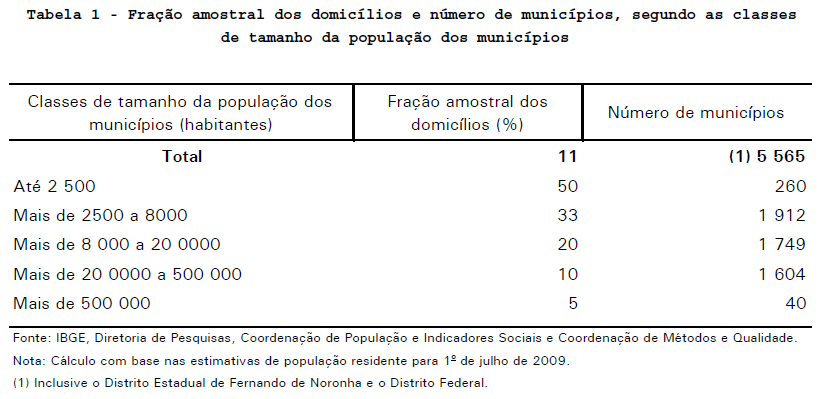

In [71]:
from PIL import Image
Image.open('amostramicrodadoscenso.png')

In [72]:
'''
So the sample fraction of municipalities is based on its population size.

Table 1 - Sample Fraction of Municipalities and number of municipalities, according to population size classes of municipalities

Population size classes of municipalities           Sample fraction of municipalities(%)          Number of municipalities 
(inhabitants)                            

        Total                                                11                                 (1) 5 565
    
    Up to 2500                                               50                                       260        
        
More than 2500 to 8000                                       33                                     1 912

More than 8000  to 200000                                    20                                     1 749
        
More than 200000 to 500000                                   10                                     1 604        
        
Mora than 500000                                              5                                        40


Footnotes:
Source: IBGE, Diretoria de Pesquisas, Coordenação de População e Indicadores Sociais e Coordenação de Métodos e Qualidade.
Note: Calculations are based on estimation from resident population for July 1, 2009
(1) Includes the State District of Fernando de Noronha and the Federal District. 
'''

'\nSo the sample fraction of municipalities is based on its population size.\n\nTable 1 - Sample Fraction of Municipalities and number of municipalities, according to population size classes of municipalities\n\nPopulation size classes of municipalities           Sample fraction of municipalities(%)          Number of municipalities \n(inhabitants)                            \n\n        Total                                                11                                 (1) 5 565\n    \n    Up to 2500                                               50                                       260        \n        \nMore than 2500 to 8000                                       33                                     1 912\n\nMore than 8000  to 200000                                    20                                     1 749\n        \nMore than 200000 to 500000                                   10                                     1 604        \n        \nMora than 500000             

In [73]:
#Before going into the Census Sectors Data let's open 'Amostra_Pessoas_26.txt', which is the sample for the people, instead of Households(Domicílios)

In [74]:
ibgecenso2010peoplepe = pd.read_fwf('C:/Users/andre/Documents/Thesis/Thesis Project/Novas planilhas até 22-12-2020/IBGE Censo 2010 Python Parser/PE/PE/Amostra_Pessoas_26.txt', header=None, dtype=str)
ibgecenso2010peoplepe

,0,1,2,3,4,5,6,7,8,9,10,11
0,2600054260005400300100002854011999710999465520...,NaN,016,NaN,13 072 1,NaN,3,52222,0000510000100000000102000002000000005100000010...,NaN,2012 2 110101010200051000000100000 315,0222222222222222222222222222222222222222222222...
1,2600054260005400300100002854011999710999465520...,NaN,016,NaN,24 1,NaN,2,42222,0000510000100000000102000002000000005100000010...,109021110201032038022,2 00111 2 2 4513 010200051000000100000 ...,0122222222222222222222222222222222222222222222...
2,2600054260005400300100010543008762192738474120...,NaN,NaN,NaN,2203 1,1,NaN,NaN,0001266000024823500042200000082745,NaN,201 3102 010300042200000082745 313,0322222222222222222222222222222222222222222222...
3,2600054260005400300100010543008762192738474120...,NaN,NaN,NaN,13 072 1,NaN,1,431 19111970004,31000510000510000100 0000510000...,132 00 0,2 0000201111323103 01030004220000008274551...,0222222222222222222222222222222222222222222222...
4,2600054260005400300100010543008762192738474120...,NaN,028,NaN,13 072 1,NaN,1,451 17112439994,31000756000756000148 0000756000...,2,1 111353102 01030004220000008274571524599922313,0122222222222222222222222222222222222222222222...
...,...,...,...,...,...,...,...,...,...,...,...,...
892245,2616506261650600100106173494006557001025964620...,NaN,015015,NaN,13 11114223,NaN,2,41 22341840131,1000900000900000176100080000015686300017000003...,1410101021010102201901,2 0002202111135202 01030006133300012026123...,0122222222222222222222222222222222222222222222...
892246,2616506261650600100106173494006557001025964620...,NaN,NaN,NaN,4 1,NaN,NaN,NaN,0001840000036078400061333000120261,NaN,202 520102010300061333000120261 316,0322222222222222222222222222222222222222222222...
892247,2616506261650600100106183328006735828565052120...,NaN,006006127000002704302,NaN,13 05 1,NaN,1,212222,0000510000100000000051000001000000001700000003...,NaN,2022 2 0002 010300017000000033333 313,0122222222222222222222222222222222222222222222...
892248,2616506261650600100106183328006735828565052120...,12700000,006006127000002704302,NaN,110508 1,1,3,52222,0000000000000000000051000001000000001700000003...,NaN,2022 2 310102010300017000000033333 313,0322222222222222222222222222222222222222222222...


In [75]:
ibgecenso2010peoplepe.shape

(892250, 12)

In [76]:
ibgecenso2010peoplepe.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11
0,2600054260005400300100002854011999710999465520...,NaN,016,NaN,13 072 1,NaN,3,52222,0000510000100000000102000002000000005100000010...,NaN,2012 2 110101010200051000000100000 315,0222222222222222222222222222222222222222222222...
1,2600054260005400300100002854011999710999465520...,NaN,016,NaN,24 1,NaN,2,42222,0000510000100000000102000002000000005100000010...,109021110201032038022,2 00111 2 2 4513 010200051000000100000 ...,0122222222222222222222222222222222222222222222...
2,2600054260005400300100010543008762192738474120...,NaN,NaN,NaN,2203 1,1,NaN,NaN,0001266000024823500042200000082745,NaN,201 3102 010300042200000082745 313,0322222222222222222222222222222222222222222222...


Again, the width equals the numbers from the INT + DEC column from 'Layout_Amostra_Microdados.xls' on the 'PESS' tab, this xls file can be downloaded from 
this direct [link](https://ftp.ibge.gov.br/Censos/Censo_Demografico_2010/Resultados_Gerais_da_Amostra/Microdados/Documentacao.zip).

In [77]:
width = [2,5,13,8,3+13,1,2,3,2,1,2,2,1,3,3,2,1,1,1,1,1,1,1,1,1,1,4,1,7,7,3,3,1,7,7,7,1,7,7,7,1,1,2,2,1,1,2,1,1,1,3,3,3,1,7,7,7,
         1,2,1,1,1,1,1,1,1,4,5,1,1,1,1,6,6,4+2,1,6,4+5,7,4+5,7,4+5,7,5+5,6+2,4+5,3,1,1,1,1,1,1,6,1,7,7,7,1,1,1,2,2,2,1,2,2,2,1,3,1,1,1,2,
         4,1,2,2,2,2,1,2,1,1,1,1,1,3,1,2,2,2,6+2,4+5,4,5,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
         1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
         1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [78]:
ibgecenso2010peoplepe = pd.read_fwf('C:/Users/andre/Documents/Thesis/Thesis Project/Novas planilhas até 22-12-2020/IBGE Censo 2010 Python Parser/PE/PE/Amostra_Pessoas_26.txt', widths=width, header=None, dtype=str)

In [79]:
ibgecenso2010peoplepe.shape

(892250, 244)

In [80]:
ibgecenso2010peoplepe.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243
0,26,00054,2600054003001,00002854,0119997109994655,2,05,017,11,1,05,02,1,040,040,NaN,1,1,NaN,4,4,4,2,3,1,NaN,NaN,NaN,NaN,NaN,NaN,016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,NaN,NaN,NaN,NaN,07,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,5,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000510,000100000,0001020,0000200000,00051000,000100000,NaN,2,NaN,1,0,0,0,000510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,01,2,NaN,2,NaN,NaN,110,1,01,01,02,00051000,000100000,NaN,NaN,NaN,NaN,3,1,5,NaN,02,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
1,26,00054,2600054003001,00002854,0119997109994655,2,05,017,11,1,01,01,2,079,079,NaN,1,1,NaN,2,2,4,2,3,1,NaN,NaN,NaN,NaN,NaN,NaN,016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,4,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000510,000100000,0001020,0000200000,00051000,000100000,NaN,2,NaN,1,0,0,0,000510,NaN,NaN,NaN,NaN,NaN,NaN,1,09,02,11,1,02,01,03,2,038,0,2,2,NaN,NaN,2,NaN,NaN,00,11,1,NaN,2,NaN,2,NaN,NaN,451,3,NaN,01,02,00051000,000100000,NaN,NaN,NaN,NaN,3,1,5,NaN,01,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
2,26,00054,2600054003001,00010543,0087621927384741,2,05,017,11,1,05,03,1,005,005,NaN,1,1,1,4,4,4,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,03,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0001266,0000248235,00042200,000082745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,01,NaN,NaN,NaN,NaN,NaN,310,2,NaN,01,03,00042200,000082745,NaN,NaN,NaN,NaN,3,1,3,NaN,03,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1


In [81]:
ibgecenso2010peoplepe.columns = ['V0001','V0002','V0011','V0300','V0010','V1001','V1002','V1003','V1004','V1006','V0502','V0504',
                                 'V0601','V6033','V6036','V6037','V6040','V0606','V0613','V0614','V0615','V0616','V0617','V0618','V0619','V0620','V0621','V0622','V6222','V6224','V0623','V0624',
'V0625','V6252','V6254','V6256','V0626','V6262','V6264','V6266','V0627','V0628','V0629','V0630','V0631','V0632','V0633','V0634',
'V0635','V6400','V6352','V6354','V6356','V0636','V6362','V6364','V6366','V0637','V0638','V0639','V0640','V0641','V0642','V0643',
'V0644','V0645','V6461','V6471','V0648','V0649','V0650','V0651','V6511','V6513','V6514','V0652','V6521','V6524','V6525','V6526',
'V6527','V6528','V6529','V6530','V6531','V6532','V0653','V0654','V0655','V0656','V0657','V0658','V0659','V6591','V0660','V6602',
'V6604','V6606','V0661','V0662','V0663','V6631','V6632','V6633','V0664','V6641','V6642','V6643','V0665','V6660','V6664','V0667',
'V0668','V6681','V6682','V0669','V6691','V6692','V6693','V6800','V0670','V0671','V6900','V6910','V6920','V6930','V6940','V6121',
'V0604','V0605','V5020','V5060','V5070','V5080','V6462','V6472','V5110','V5120','V5030','V5040','V5090','V5100','V5130','M0502',
'M0601','M6033','M0606','M0613','M0614','M0615','M0616','M0617','M0618','M0619','M0620','M0621','M0622','M6222','M6224','M0623',
'M0624','M0625','M6252','M6254','M6256','M0626','M6262','M6264','M6266','M0627','M0628','M0629','M0630','M0631','M0632','M0633',
'M0634','M0635','M6352','M6354','M6356','M0636','M6362','M6364','M6366','M0637','M0638','M0639','M0640','M0641','M0642','M0643',
'M0644','M0645','M6461','M6471','M0648','M0649','M0650','M0651','M6511','M0652','M6521','M0653','M0654','M0655','M0656','M0657',
'M0658','M0659','M6591','M0660','M6602','M6604','M6606','M0661','M0662','M0663','M6631','M6632','M6633','M0664','M6641','M6642',
'M6643','M0665','M6660','M0667','M0668','M6681','M6682','M0669','M6691','M6692','M6693','M0670','M0671','M6800','M6121','M0604',
'M0605','M6462','M6472','V1005']

In [82]:
ibgecenso2010peoplepe.head()

,V0001,V0002,V0011,V0300,V0010,V1001,V1002,V1003,V1004,V1006,V0502,V0504,V0601,V6033,V6036,V6037,V6040,V0606,V0613,V0614,V0615,V0616,V0617,V0618,V0619,V0620,V0621,V0622,V6222,V6224,V0623,V0624,V0625,V6252,V6254,V6256,V0626,V6262,V6264,V6266,V0627,V0628,V0629,V0630,V0631,V0632,V0633,V0634,V0635,V6400,V6352,V6354,V6356,V0636,V6362,V6364,V6366,V0637,V0638,V0639,V0640,V0641,V0642,V0643,V0644,V0645,V6461,V6471,V0648,V0649,V0650,V0651,V6511,V6513,V6514,V0652,V6521,V6524,V6525,V6526,V6527,V6528,V6529,V6530,V6531,V6532,V0653,V0654,V0655,V0656,V0657,V0658,V0659,V6591,V0660,V6602,V6604,V6606,V0661,V0662,V0663,V6631,V6632,V6633,V0664,V6641,V6642,V6643,V0665,V6660,V6664,V0667,V0668,V6681,V6682,V0669,V6691,V6692,V6693,V6800,V0670,V0671,V6900,V6910,V6920,V6930,V6940,V6121,V0604,V0605,V5020,V5060,V5070,V5080,V6462,V6472,V5110,V5120,V5030,V5040,V5090,V5100,V5130,M0502,M0601,M6033,M0606,M0613,M0614,M0615,M0616,M0617,M0618,M0619,M0620,M0621,M0622,M6222,M6224,M0623,M0624,M0625,M6252,M6254,M6256,M0626,M6262,M6264,M6266,M0627,M0628,M0629,M0630,M0631,M0632,M0633,M0634,M0635,M6352,M6354,M6356,M0636,M6362,M6364,M6366,M0637,M0638,M0639,M0640,M0641,M0642,M0643,M0644,M0645,M6461,M6471,M0648,M0649,M0650,M0651,M6511,M0652,M6521,M0653,M0654,M0655,M0656,M0657,M0658,M0659,M6591,M0660,M6602,M6604,M6606,M0661,M0662,M0663,M6631,M6632,M6633,M0664,M6641,M6642,M6643,M0665,M6660,M0667,M0668,M6681,M6682,M0669,M6691,M6692,M6693,M0670,M0671,M6800,M6121,M0604,M0605,M6462,M6472,V1005
0,26,00054,2600054003001,00002854,0119997109994655,2,05,017,11,1,05,02,1,040,040,NaN,1,1,NaN,4,4,4,2,3,1,NaN,NaN,NaN,NaN,NaN,NaN,016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,NaN,NaN,NaN,NaN,07,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,5,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000510,000100000,0001020,0000200000,00051000,000100000,NaN,2,NaN,1,0,0,0,000510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,01,2,NaN,2,NaN,NaN,110,1,01,01,02,00051000,000100000,NaN,NaN,NaN,NaN,3,1,5,NaN,02,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
1,26,00054,2600054003001,00002854,0119997109994655,2,05,017,11,1,01,01,2,079,079,NaN,1,1,NaN,2,2,4,2,3,1,NaN,NaN,NaN,NaN,NaN,NaN,016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,4,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0000510,000100000,0001020,0000200000,00051000,000100000,NaN,2,NaN,1,0,0,0,000510,NaN,NaN,NaN,NaN,NaN,NaN,1,09,02,11,1,02,01,03,2,038,0,2,2,NaN,NaN,2,NaN,NaN,00,11,1,NaN,2,NaN,2,NaN,NaN,451,3,NaN,01,02,00051000,000100000,NaN,NaN,NaN,NaN,3,1,5,NaN,01,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
2,26,00054,2600054003001,00010543,0087621927384741,2,05,017,11,1,05,03,1,005,005,NaN,1,1,1,4,4,4,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,03,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0001266,0000248235,00042200,000082745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,01,NaN,NaN,NaN,NaN,NaN,310,2,NaN,01,03,00042200,000082745,NaN,NaN,NaN,NaN,3,1,3,NaN,03,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
3,26,00054,2600054003001,00010543,0087621927384741,2,05,017,11,1,02,02,2,060,060,NaN,1,4,NaN,4,4,4,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,NaN,NaN,NaN,NaN,07,2,NaN,1,NaN,NaN,NaN,NaN

In [83]:
#When working with the data do not forget to use the variable V0300, which is a control variable
#(if a same number is repeated for different rows in this V0300 column, it's because the same residence was surveyed)
#Also variable V0011, which is the weighting area, already explained, 
#and especilally the variable V0010 which is the weight sample,
#which has 13 decimals, this variable is used to expand the sample data to represent the universe

In [84]:
ibgecenso2010peoplepe['V0001'].unique() #V0001 represents the state, 26 for Pernambuco

array(['26'], dtype=object)

In [85]:
ibgecenso2010peoplepe['V0002'].unique() #V002 represents the Municipality 

array(['00054', '00104', '00203', '00302', '00401', '00500', '00609',
       '00708', '00807', '00906', '01003', '01052', '01102', '01201',
       '01300', '01409', '01508', '01607', '01706', '01805', '01904',
       '02001', '02100', '02209', '02308', '02407', '02506', '02605',
       '02704', '02803', '02902', '03009', '03108', '03207', '03306',
       '03405', '03454', '03504', '03603', '03702', '03801', '03900',
       '03926', '04007', '04106', '04155', '04205', '04304', '04403',
       '04502', '04601', '04700', '04809', '04908', '05004', '05103',
       '05152', '05202', '05301', '05400', '05459', '05509', '05608',
       '05707', '05806', '05905', '06002', '06101', '06200', '06309',
       '06408', '06507', '06606', '06705', '06804', '06903', '07000',
       '07109', '07208', '07307', '07406', '07505', '07604', '07653',
       '07703', '07752', '07802', '07901', '07950', '08008', '08057',
       '08107', '08206', '08255', '08305', '08404', '08453', '08503',
       '08602', '087

In [86]:
ibgecenso2010peoplepe['V0300'] #control variable

0         00002854
1         00002854
2         00010543
3         00010543
4         00010543
            ...   
892245    06173494
892246    06173494
892247    06183328
892248    06183328
892249    06183328
Name: V0300, Length: 892250, dtype: object

In [87]:
ibgecenso2010peoplepe['V0010'] #weight sample

0         0119997109994655
1         0119997109994655
2         0087621927384741
3         0087621927384741
4         0087621927384741
                ...       
892245    0065570010259646
892246    0065570010259646
892247    0067358285650521
892248    0067358285650521
892249    0067358285650521
Name: V0010, Length: 892250, dtype: object

In [88]:
ibgecenso2010peoplepe['V0011'].unique() #V0011 represents the Weighting Area

array(['2600054003001', '2600054003002', '2600054003003', '2600054003004',
       '2600054003005', '2600104003001', '2600104003002', '2600203001001',
       '2600302001001', '2600401001001', '2600500003001', '2600500003002',
       '2600609001001', '2600708003001', '2600708003002', '2600807001001',
       '2600906001001', '2601003001001', '2601052001001', '2601102003001',
       '2601102003002', '2601102003003', '2601201003001', '2601201003002',
       '2601201003003', '2601300001001', '2601409003001', '2601409003002',
       '2601508001001', '2601607001001', '2601706003001', '2601706003002',
       '2601706003003', '2601805001001', '2601904003001', '2601904003002',
       '2601904003003', '2602001003001', '2602001003002', '2602100003001',
       '2602100003002', '2602209003001', '2602209003002', '2602308003001',
       '2602308003002', '2602407001001', '2602506001001', '2602605003001',
       '2602605003002', '2602704001001', '2602803003001', '2602803003002',
       '2602902003001', '

In [89]:
ibgecenso2010peoplepe['V0601'].unique() #V0601 represents sex

array(['1', '2'], dtype=object)

In [90]:
ibgecenso2010peoplepe['V0601'].value_counts() #which makes sense, the number of men and women are very similar

2    457951
1    434299
Name: V0601, dtype: int64

In [91]:
#All other variables can be checked. See the dictionary 'Layout_Amostra_Microdados.xls' on the 'PESS' tab, the link was already posted

In [92]:
#ibgecenso2010peoplepe.groupby('V0001')['V0010', 'V0601'].agg('sum'), I was just running this code to see what would happen

In [93]:
#an example using the weight sample variable 'V0010' would be

In [94]:
ibgecenso2010peoplepe['V0010'].dtype

dtype('O')

In [95]:
ibgecenso2010peoplepe['V0601'].dtype

dtype('O')

In [96]:
ibgecenso2010peoplepe['V0010'] = ibgecenso2010peoplepe['V0010'].astype('int64')
ibgecenso2010peoplepe['V0601'] = ibgecenso2010peoplepe['V0601'].astype('int8')

In [97]:
import numpy as np 

In [98]:
print(np.average(ibgecenso2010peoplepe['V0601'], weights=ibgecenso2010peoplepe['V0010']))

1.5190466651994075


In [99]:
#it does not make much sense because it's taking 1 -> men and 2 -> women from sex, changing it a bit

In [100]:
ibgecenso2010peoplepe['V0601'].replace(2,0)

0         1
1         0
2         1
3         0
4         1
         ..
892245    0
892246    1
892247    1
892248    1
892249    0
Name: V0601, Length: 892250, dtype: int8

In [101]:
ibgecenso2010peoplepe['V0601'] = ibgecenso2010peoplepe['V0601'].replace(2,0)

In [102]:
ibgecenso2010peoplepe['V0601'].mean()

0.486745867189689

In [103]:
#48,67% of the data is composed of men 

In [104]:
np.average(ibgecenso2010peoplepe['V0601']) #same thing using numpy 

0.486745867189689

In [105]:
np.average(ibgecenso2010peoplepe['V0601'], weights=ibgecenso2010peoplepe['V0010'])

0.48095333480059216

In [106]:
#and if the weight sample is used, there is a little difference, it's 48,09% men now.

In [107]:
#feel free to do all different things with the weight sample variable, Census around the world usually have this variable
#you can test the weight sample variable in other censuses

## Census Sectors Data

I've seen researches with the unit bairros and census sectors, but where is it in the Census Data, this does not make sense.
What if someone wants to work with the Census Sectors and Bairros units without making maps at first.
I knew it had to be somewhere. And I have no idea why this is not easily found like the main microdata for [Censo 2010](https://www.ibge.gov.br/estatisticas/sociais/populacao/9662-censo-demografico-2000.html?=&t=microdados) in the main area of the website. By the way, this IBGE page has many important data to [download](https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html), besides the [methods](https://www.ibge.gov.br/apps/snig/v1/notas_metodologicas.html?loc=0) used in the sampling. After looking through many pages in [IBGE censo2010](https://censo2010.ibge.gov.br), [here](https://ftp.ibge.gov.br/Censos/Censo_Demografico_2010/Sinopse/Agregados_por_Setores_Censitarios/) it is, the microdata for all states, including census sectors, bairros units. Because I am looking at the state of Pernambuco I downloaded it [here](https://ftp.ibge.gov.br/Censos/Censo_Demografico_2010/Sinopse/Agregados_por_Setores_Censitarios/Base_informacoes_setores2010_sinopse_PE.zip). There's the need to see the Documentation (Documentação) inside the zip file, to know what each variable means.

In [108]:
#After downloading the zip file there are 3 files, the main one 'Base_informações_setores2010_sinopse_PE.xls', 
#'Descrição_PE.xls' and 'Documentação.pdf'. The latter is describing what each variable is, the second file describes, where
#each census sector is located by what street intersection, the first file is the main one. Let's look at the second one first.

In [109]:
description_censussector = pd.read_excel('C:/Users/andre/Documents/Thesis/Thesis Project/Novas planilhas até 22-12-2020/IBGE Censo 2010 Python Parser/Setor Censitário/Base_informacoes_setores2010_sinopse_PE/Base_informações_setores2010_sinopse_PE/Descrição_PE.xls')

In [110]:
description_censussector.head(3)

,Geocodigo,uf,mun,distr,sdist,setor,ponto inicial,Descrição do perímetro,Setores internos não pertencentes ao setor,Aglomerados rurais (somente os identificados)
0,260030210000001,26,302,10,0,1,"""MARCO-1"" LOCALIZADO NA PONTE SOBRE O ""RIO DA...","DO PONTO INICIAL PELO ""RIO DAS CHATAS"" ATE SU...",NADA A REGISTRAR,NADA A REGISTRAR
1,260030210000002,26,302,10,0,2,"ENCONTRO DO ""LIMITE INTERDISTRITAL AGRESTINA-B...","DO PONTO INICIAL ATE ""RIO UNA"",""LIMITE INTERDI...",NADA A REGISTRAR,VARIANTE
2,260030210000003,26,302,10,0,3,"CRUZAMENTO DO ""RIO UNA"" COM LIMITE INTERMUNICI...","DO PONTO INICIAL ATE O LIMITE INTERMUNICIPAL ""...",0004-AP,NADA A REGISTRAR


In [111]:
description_censussector.shape

(12498, 10)

In [112]:
#Now the first and main one

In [113]:
census_sectorPE = pd.read_excel('C:/Users/andre/Documents/Thesis/Thesis Project/Novas planilhas até 22-12-2020/IBGE Censo 2010 Python Parser/Setor Censitário/Base_informacoes_setores2010_sinopse_PE/Base_informações_setores2010_sinopse_PE/Base_informações_setores2010_sinopse_PE.xls')

In [114]:
census_sectorPE.head(3)

,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012,V013,V014,V015,V016,V017,V018,V019,V020,V021,V022,V023,V024,V025,V026,V027,V028,V029,V030,V031,V032,V033,V034,V035,V036,V037,V038,V039,V040,V041,V042,V043,V044,V045,V046,V047,V048,V049,V050,V051,V052,V053,V054,V055,V056,V057,V058,V059,V060,V061,V062,V063,V064,V065,V066,V067,V068,V069,V070,V071,V072,V073,V074,V075,V076,V077,V078,V079,V080,V081,V082,V083,V084,V085,V086,V087,V088,V089,V090,V091,V092,V093,V094,V095,V096,V097,V098,V099,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154
0,260005405000001,2,Região Nordeste,26,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,237,237,211,205,6,26,2,24,0,211,0,0,0,724,336,388,724,703,21,0,0,336,329,7,0,0,388,374,14,0,0,8,9,13,9,6,17,13,12,13,17,7,9,19,9,16,16,12,12,16,5,5,11,9,8,8,71,67,58,59,31,33,25,32,19,15,18,7,5,3,0,2,2,6,8,4,2,10,6,5,4,12,3,3,11,5,11,8,3,5,7,3,3,7,5,3,2,30,38,28,32,7,20,8,9,8,5,8,2,1,0,0,2,6,3,5,5,4,7,7,7,9,5,4,6,8,4,5,8,9,7,9,2,2,4,4,5,6,41,29,30,27,24,13,17,23,11,10,10,5,4,3,0,0
1,260005405000002,2,Região Nordeste,26,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,236,236,223,221,2,13,0,13,0,223,0,0,0,750,338,412,750,744,6,0,0,338,335,3,0,0,412,409,3,0,0,8,7,8,9,7,5,9,7,9,8,13,15,14,17,10,21,12,13,11,11,12,9,12,19,10,50,56,71,75,41,31,32,35,29,26,9,13,2,3,0,1,3,5,4,8,3,3,4,1,2,5,2,8,10,9,4,10,5,5,5,5,4,6,6,7,3,33,16,35,32,20,17,16,14,10,10,2,5,1,0,0,0,5,2,4,1,4,2,5,6,7,3,11,7,4,8,6,11,7,8,6,6,8,3,6,12,7,17,40,36,43,21,14,16,21,19,16,7,8,1,3,0,1
2,260005405000003,2,Região Nordeste,26,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,153,153,140,138,2,13,3,10,0,140,0,0,0,417,184,233,417,409,8,0,0,184,181,3,0,0,233,228,5,0,0,5,1,4,4,6,4,3,4,4,3,6,4,7,4,7,10,2,10,3,5,8,3,9,12,11,28,27,33,35,40,25,23,23,11,13,8,9,3,0,0,0,1,1,1,0,2,2,2,4,1,1,3,2,5,2,3,6,1,5,1,2,3,2,7,6,7,14,10,15,15,15,9,10,12,4,5,3,1,1,0,0,0,4,0,3,4,4,2,1,0,3,2,3,2,2,2,4,4,1,5,2,3,5,1,2,6,4,14,17,18,20,25,16,13,11,7,8,5,8,2,0,0,0


In [115]:
census_sectorPE.shape

(12392, 174)

In [116]:
#now the cod_setor (cod_sector) has 15 digits, and there is the bairro unit as well with the 'Cod_bairro' column

In [117]:
#But this whole data basically only covers information about if where the person lives, if the housing is owned, rented, occupied, who lives with them
#if it's a man or a woman and their ages. The variable information can be seen below.

In [118]:
from PIL import Image

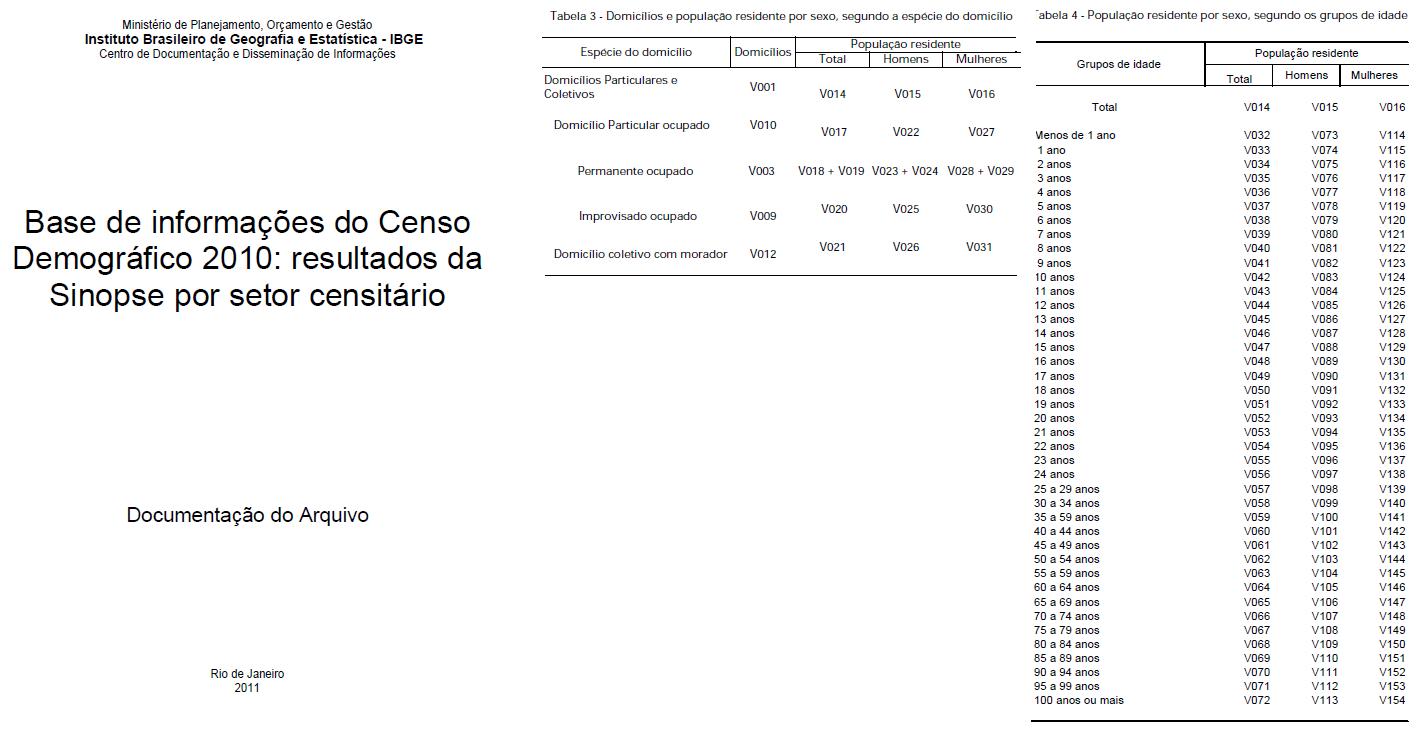

In [119]:
Image.open('C:/Users/andre/Documents/Thesis/Thesis Project/Novas planilhas até 22-12-2020/IBGE Censo 2010 Python Parser/Setor Censitário/Base_informacoes_setores2010_sinopse_PE/Base_informações_setores2010_sinopse_PE/documentationsummary.png')

### Census Sector Main Data

There has to be still a microdata with many important information that contains the census sectors, bairros units and many 
other important variables, and there it [is](https://ftp.ibge.gov.br/Censos/Censo_Demografico_2010/Resultados_do_Universo/Agregados_por_Setores_Censitarios/).
The documentation will be needed for [sure](https://ftp.ibge.gov.br/Censos/Censo_Demografico_2010/Resultados_do_Universo/Agregados_por_Setores_Censitarios/Documentacao_Agregado_dos_Setores_20180416.zip).
To download the data for the state of [Pernambuco](https://ftp.ibge.gov.br/Censos/Censo_Demografico_2010/Resultados_do_Universo/Agregados_por_Setores_Censitarios/PE_20200219.zip). The zip file contains,
26 different csv files, each with a lot of information, covering wage, race, sex, census sector, education, with over 3200 variables!

In [120]:
'''
#pip install textract
import textract
text = textract.process('C:/Users/andre/Documents/Thesis/Thesis Project/Novas planilhas até 22-12-2020/IBGE Censo 2010 Python Parser/Setor Censitário Universo/Documentacao_Agregado_dos_Setores_20180416/Documentação/BASE DE INFORMAÇÕES POR SETOR CENSITÁRIO Censo 2010 - Universo.pdf',method='pdfminer')
'''

"\n#pip install textract\nimport textract\ntext = textract.process('C:/Users/andre/Documents/Thesis/Thesis Project/Novas planilhas até 22-12-2020/IBGE Censo 2010 Python Parser/Setor Censitário Universo/Documentacao_Agregado_dos_Setores_20180416/Documentação/BASE DE INFORMAÇÕES POR SETOR CENSITÁRIO Censo 2010 - Universo.pdf',method='pdfminer')\n"

In [121]:
#pip install PyPDF2

In [122]:
#Because there are so many csv files and over 3200 variables I opened the data dictionary pdf below,
#the pdf file is called 'BASE DE INFORMAÇÕES POR SETOR CENSITÁRIO Censo 2010 - Universo.pdf'
#rename any variable according to the dictionary

In [123]:
#pip install tika
from tika import parser
raw = parser.from_file('C:/Users/andre/Documents/Thesis/Thesis Project/Novas planilhas até 22-12-2020/IBGE Censo 2010 Python Parser/Setor Censitário Universo/Documentacao_Agregado_dos_Setores_20180416/Documentação/BASE DE INFORMAÇÕES POR SETOR CENSITÁRIO Censo 2010 - Universo.pdf')
print(raw['content'])
















































Ministério de Planejamento, Orçamento e Gestão


Ministério de Planejamento, Orçamento e Gestão 

Instituto Brasileiro de Geografia e Estatística - IBGE 

Centro de Documentação e Disseminação de Informações 
 

 

 

 

 

 

 

 

 

 

 

 

 

 

Base de informações do Censo 

Demográfico 2010: Resultados do Universo por 

setor censitário 
 

 

 

 

 

 

 

 

 

 

 

 

 

 

Documentação do Arquivo 

 

 

 

 

 

 

 

 
Rio de Janeiro 

2011 

 



 

BASE DE INFORMAÇÕES POR SETOR CENSTÁRIO Página 2 

ANO - 2010 

 

Sumário 

Sumário ........................................................................................................................................... 2 
1 Introdução ....................................................................................................................................................... 4 

2 Notas técnicas .....................................................................

In [124]:
#Opening one of the csv (or xls) files

In [125]:
Basico_PE = pd.read_excel('C:/Users/andre/Documents/Thesis/Thesis Project/Novas planilhas até 22-12-2020/IBGE Censo 2010 Python Parser/Setor Censitário Universo/PE_20200219/PE_20171016/PE/Base informaçoes setores2010 universo PE/EXCEL/Basico_PE.xls')

In [126]:
#try using the csv file, most of the time it's better to work with csv files

In [127]:
Basico_PE.head(10)

,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,260005405000001,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,211.0,724.0,3.43,2.24,452.80,369490.04,764.32,385725.20,322.30,266389.59,693.75,315881.23
1,260005405000002,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,223.0,750.0,3.36,2.11,632.62,260188.28,727.19,230159.08,386.56,229024.17,686.42,200776.62
2,260005405000003,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,140.0,417.0,2.98,2.12,973.50,1573094.48,1117.13,1645327.64,623.45,958614.38,1005.48,1162765.85
3,260005405000004,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,318.0,971.0,3.05,2.07,637.76,396666.92,765.31,378314.62,382.99,295420.17,658.24,326616.90
4,260005405000005,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054002,Alto São Miguel,1,0,258.0,890.0,3.45,2.57,401.38,164913.04,531.05,149248.06,249.22,113465.23,474.34,109166.17
5,260005405000006,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,301.0,1012.0,3.36,2.91,663.93,451121.09,740.16,446477.65,386.66,306701.56,661.75,342936.90
6,260005405000007,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054008,Fosfato,1,1,184.0,623.0,3.39,2.78,383.88,45299.94,467.77,15760.62,232.58,62527.64,463.29,17488.34
7,260005405000008,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054001,Alto da Bela Vista,1,0,457.0,1556.0,3.40,2.48,755.33,827859.31,901.27,856355.03,440.00,1146759.89,852.70,1871504.11
8,260005405000009,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,305.0,976.0,3.20,2.45,826.86,832247.43,866.64,837831.25,454.26,475532.81,704.91,561392.19
9,260005405000010,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,354.0,1116.0,3.15,1.84,640.52,233365.49,722.11,204079.97,383.48,215923.45,667.31,186283.99


In [128]:
Basico_PE.shape

(12379, 33)

In [129]:
#As we can see on the table above and on the pdf below, there were 12379 households actually surveyed  in the state of Pernambuco.
#And the census sector with 15 digits is the 'Cod_setor', this variable is not on the other data with over 253k rows for the households
#nor the data with over 892k rows for the people.

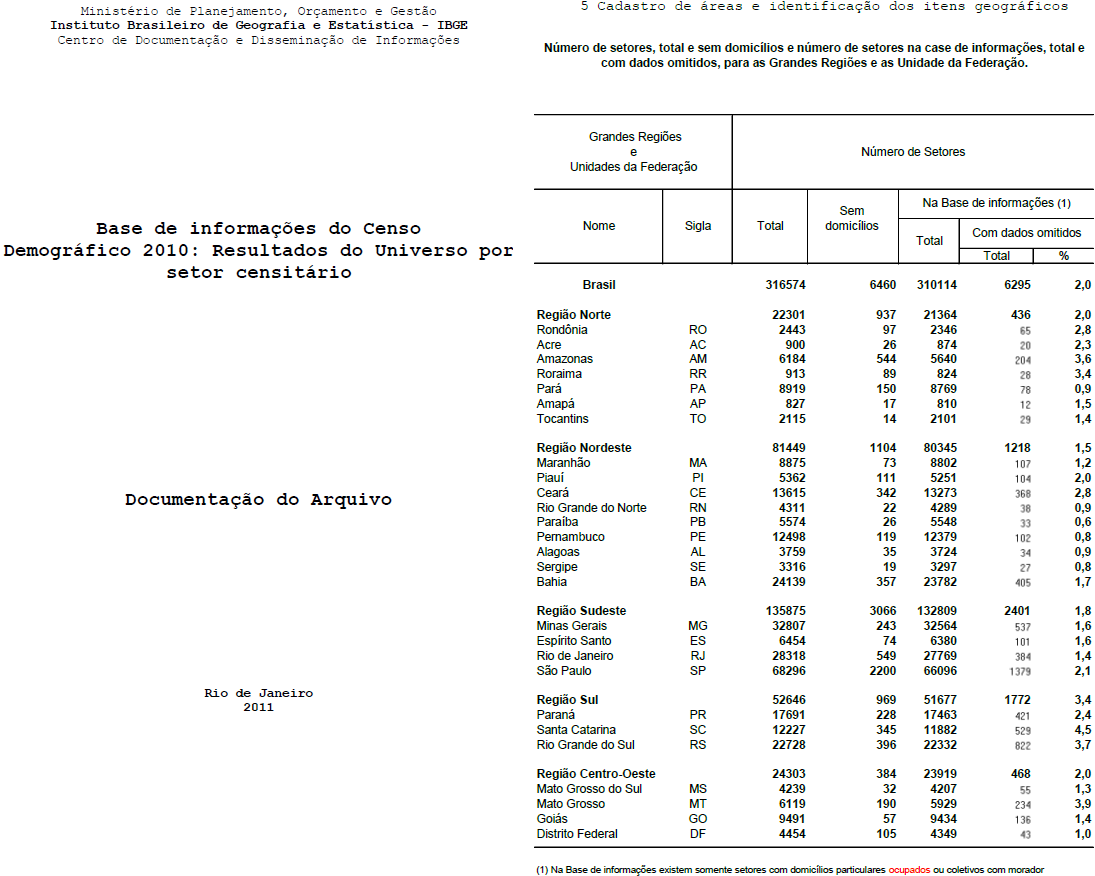

In [130]:
Image.open('C:/Users/andre/Documents/Thesis/Thesis Project/Novas planilhas até 22-12-2020/IBGE Censo 2010 Python Parser/Setor Censitário Universo/samplehouseholdsummary.png')

## Census Mersh

If anyone wants to work with census sectors maps, there is the Census Mesh. Mesh of Enumeration Area or, simply [Census Mesh](https://www.ibge.gov.br/en/geosciences/territorial-organization/territorial-meshes/2998-np-mesh-of-enumeration-areas/28114-malhas-de-setores-censitarios-divisoes-intramunicipais-2.html?=&t=o-que-e). The Census Mesh is mostly used for making maps and analysing the Census Sectors. Before downloading the files, know that these following links are for very specific census mersh, it contains an areas between streets intersection, depending on how specific you want your maps to be, you might want to use it, because it is very detailed there are many different shape files, it can be downloaded [here](https://geoftp.ibge.gov.br/recortes_para_fins_estatisticos/malha_de_setores_censitarios/censo_2010/). I'm working with the state of Pernambuco, the latter can be downloaded [here](https://geoftp.ibge.gov.br/recortes_para_fins_estatisticos/malha_de_setores_censitarios/censo_2010/base_de_faces_de_logradouros_versao_2020/PE/pe_faces_de_logradouros_2020.zip).

If you do not want the census mersh to be very specific, to download the census mersh for the state of Pernambuco between municipalities, here is the [website](https://portaldemapas.ibge.gov.br/portal.php#homepage). Click on 'Extensão' (Extension), then on 'SHP', 
after that on 'Malha de setores censitários' (Mersh for Census Sectors'), then '2010' and the state you want, in my case
Pernambuco, and download the zip file 'pe_setores_censitarios.zip', the direct download [link](https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_de_setores_censitarios__divisoes_intramunicipais/censo_2010/setores_censitarios_shp/pe/pe_setores_censitarios.zip). This file is for the census mersh between municipalities containing one shape file.

In [131]:
#Using the data 'Basico_PE' that was opened right above

In [132]:
#pip install dbfread
#from dbfread import DBF
#table = DBF('C:/Users/andre/Documents/Thesis/Thesis Project/Novas planilhas até 22-12-2020/IBGE Censo 2010 Python Parser/Malha do Setor Censiátrio/pe_setores_censitarios/26SEE250GC_SIR.dbf', load=True)
#print(table.records[1])

In [133]:
Basico_PE

,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,260005405000001,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,211.0,724.0,3.43,2.24,452.80,369490.04,764.32,385725.20,322.30,266389.59,693.75,315881.23
1,260005405000002,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,223.0,750.0,3.36,2.11,632.62,260188.28,727.19,230159.08,386.56,229024.17,686.42,200776.62
2,260005405000003,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,140.0,417.0,2.98,2.12,973.50,1573094.48,1117.13,1645327.64,623.45,958614.38,1005.48,1162765.85
3,260005405000004,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,318.0,971.0,3.05,2.07,637.76,396666.92,765.31,378314.62,382.99,295420.17,658.24,326616.90
4,260005405000005,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054002,Alto São Miguel,1,0,258.0,890.0,3.45,2.57,401.38,164913.04,531.05,149248.06,249.22,113465.23,474.34,109166.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12374,261650605000020,2,Região Nordeste,PE,Pernambuco,2604,Mata Pernambucana,26015,Mata Meridional Pernambucana,0,Municípios não pertencentes a estrutura de RM,2616506,XEXÉU,261650605,XEXÉU,26165060500,XEXÉU,2616506000,XEXÉU (todos os setores),8,0,93.0,384.0,4.13,5.90,520.62,2346015.76,620.74,2740075.88,235.64,888895.17,499.55,1758414.96
12375,261650605000021,2,Região Nordeste,PE,Pernambuco,2604,Mata Pernambucana,26015,Mata Meridional Pernambucana,0,Municípios não pertencentes a estrutura de RM,2616506,XEXÉU,261650605,XEXÉU,26165060500,XEXÉU,2616506000,XEXÉU (todos os setores),1,0,284.0,1018.0,3.58,3.61,577.31,637340.54,807.67,705936.94,334.28,374346.05,689.71,527603.40
12376,261650605000022,2,Região Nordeste,PE,Pernambuco,2604,Mata Pernambucana,26015,Mata Meridional Pernambucana,0,Municípios não pertencentes a estrutura de RM,2616506,XEXÉU,261650605,XEXÉU,26165060500,XEXÉU,2616506000,XEXÉU (todos os setores),1,0,194.0,727.0,3.75,3.15,573.14,221280.40,657.92,198095.71,285.78,178126.72,576.35,191817.22
12377,261650605000023,2,Região Nordeste,PE,Pernambuco,2604,Mata Pernambucana,26015,Mata Meridional Pernambucana,0,Municípios não pertencentes a estrutura de RM,2616506,XEXÉU,261650605,XEXÉU,26165060500,XEXÉU,2616506000,XEXÉU (todos os setores),1,0,153.0,572.0,3.74,5.42,419.50,87596.21,513.46,58738.09,214.23,78053.11,431.24,63472.66


In [134]:
pd.set_option('display.max_columns',None)

In [135]:
Basico_PE.head(3)

,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,260005405000001,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,211.0,724.0,3.43,2.24,452.80,369490.04,764.32,385725.20,322.30,266389.59,693.75,315881.23
1,260005405000002,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,223.0,750.0,3.36,2.11,632.62,260188.28,727.19,230159.08,386.56,229024.17,686.42,200776.62
2,260005405000003,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,140.0,417.0,2.98,2.12,973.50,1573094.48,1117.13,1645327.64,623.45,958614.38,1005.48,1162765.85


In [136]:
Basico_PE.tail(3)

,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
12376,261650605000022,2,Região Nordeste,PE,Pernambuco,2604,Mata Pernambucana,26015,Mata Meridional Pernambucana,0,Municípios não pertencentes a estrutura de RM,2616506,XEXÉU,261650605,XEXÉU,26165060500,XEXÉU,2616506000,XEXÉU (todos os setores),1,0,194.0,727.0,3.75,3.15,573.14,221280.40,657.92,198095.71,285.78,178126.72,576.35,191817.22
12377,261650605000023,2,Região Nordeste,PE,Pernambuco,2604,Mata Pernambucana,26015,Mata Meridional Pernambucana,0,Municípios não pertencentes a estrutura de RM,2616506,XEXÉU,261650605,XEXÉU,26165060500,XEXÉU,2616506000,XEXÉU (todos os setores),1,0,153.0,572.0,3.74,5.42,419.50,87596.21,513.46,58738.09,214.23,78053.11,431.24,63472.66
12378,261650605000024,2,Região Nordeste,PE,Pernambuco,2604,Mata Pernambucana,26015,Mata Meridional Pernambucana,0,Municípios não pertencentes a estrutura de RM,2616506,XEXÉU,261650605,XEXÉU,26165060500,XEXÉU,2616506000,XEXÉU (todos os setores),1,0,163.0,538.0,3.30,3.36,494.01,754418.16,712.60,934053.94,283.53,374540.86,605.49,605979.97


In [137]:
#from the dictionary 'BASE DE INFORMAÇÕES POR SETOR CENSITÁRIO Censo 2010 - Universo.pdf' file inside the documentation we can see 
#what each variable is 

#V001 -> Domicílios particulares permanentes ou pessoas responsáveis por domicílios particulares permanentes
#V002 -> Moradores em domicílios particulares permanentes ou população residente em domicílios particulares permanentes
#V003 -> Média do número de moradores em domicílios particulares permanentes (obtida pela divisão de Var2 por Var1)
#V004 -> Variância do número de moradores em domicílios particulares permanentes
#V005 -> Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)

In [138]:
#choosing V001, V003 and V005 as an example
#V001 -> Permanent private domiciles or persons responsible for permanent private domiciles
#V003 -> Average number of residents in permanent private households (obtained by dividing Var2 by Var1)
#V005 -> Value of the monthly average nominal income of persons responsible for permanent private households (with and without income)
#V005 will be used to make the map below 

In [139]:
import geopandas as gpd

In [140]:
pe_censusmersh = gpd.read_file('C:/Users/andre/Documents/Thesis/Thesis Project/Novas planilhas até 22-12-2020/IBGE Censo 2010 Python Parser/Malha do Setor Censiátrio/pe_setores_censitarios/26SEE250GC_SIR.shp')

In [141]:
pe_censusmersh.shape

(12498, 14)

In [142]:
pe_censusmersh.head(3)

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,geometry
0,22861,260060910000004,RURAL,None,None,26006091000,None,260060910,PERPÉTUO SOCORRO,2600609,ALAGOINHA,VALE DO IPOJUCA,AGRESTE PERNAMBUCANO,"POLYGON ((-36.76326 -8.57873, -36.76295 -8.578..."
1,22862,260060910000005,RURAL,None,None,26006091000,None,260060910,PERPÉTUO SOCORRO,2600609,ALAGOINHA,VALE DO IPOJUCA,AGRESTE PERNAMBUCANO,"POLYGON ((-36.74997 -8.53317, -36.74078 -8.537..."
2,22863,260060910000006,RURAL,None,None,26006091000,None,260060910,PERPÉTUO SOCORRO,2600609,ALAGOINHA,VALE DO IPOJUCA,AGRESTE PERNAMBUCANO,"POLYGON ((-36.72974 -8.51369, -36.72735 -8.514..."


<AxesSubplot:>

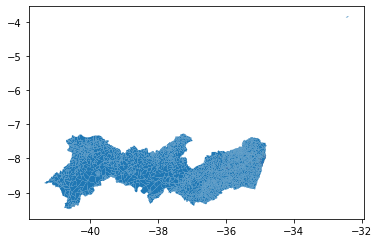

In [143]:
pe_censusmersh.plot()

In [144]:
import matplotlib.pyplot as plt

(-10.0, -7.0)

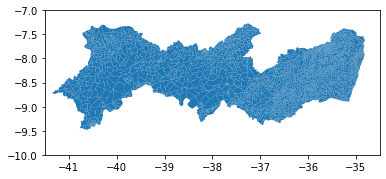

In [145]:
pe_censusmersh.plot();
plt.xlim(-41.5, -34.5)
plt.ylim(-10,-7)

(-42.0, -34.0)

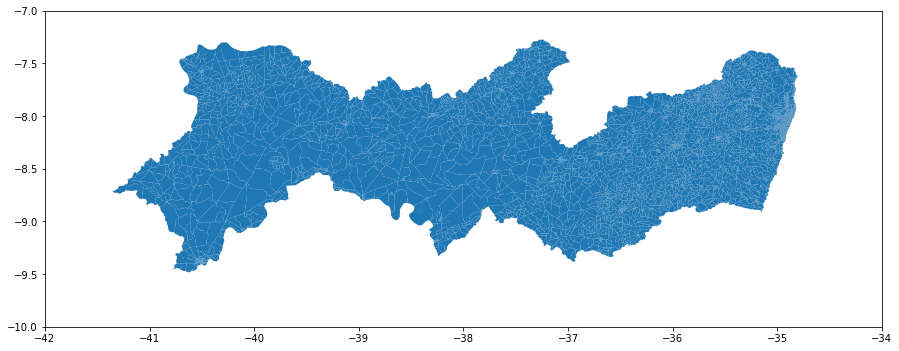

In [146]:
fig, ax = plt.subplots(figsize=(15,15))
pe_censusmersh.plot(ax=ax)
ax.set_ylim(-10,-7)
ax.set_xlim(-42,-34)

In [147]:
pe_censusmersh.sort_values(by='CD_GEOCODI').head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,geometry
14,22491,260005405000001,URBANO,260005405006,Centro,26000540500,None,260005405,ABREU E LIMA,2600054,ABREU E LIMA,RECIFE,METROPOLITANA DE RECIFE,"POLYGON ((-34.89797 -7.90403, -34.89820 -7.904..."
15,22492,260005405000002,URBANO,260005405006,Centro,26000540500,None,260005405,ABREU E LIMA,2600054,ABREU E LIMA,RECIFE,METROPOLITANA DE RECIFE,"POLYGON ((-34.89821 -7.90418, -34.89793 -7.904..."
16,22493,260005405000003,URBANO,260005405006,Centro,26000540500,None,260005405,ABREU E LIMA,2600054,ABREU E LIMA,RECIFE,METROPOLITANA DE RECIFE,"POLYGON ((-34.90205 -7.90740, -34.90192 -7.907..."
17,22494,260005405000004,URBANO,260005405006,Centro,26000540500,None,260005405,ABREU E LIMA,2600054,ABREU E LIMA,RECIFE,METROPOLITANA DE RECIFE,"POLYGON ((-34.90337 -7.90485, -34.90336 -7.905..."
18,22495,260005405000005,URBANO,260005405002,Alto São Miguel,26000540500,None,260005405,ABREU E LIMA,2600054,ABREU E LIMA,RECIFE,METROPOLITANA DE RECIFE,"POLYGON ((-34.90524 -7.90332, -34.90525 -7.903..."


In [148]:
Basico_PE['Cod_setor'].dtypes

dtype('int64')

In [149]:
pe_censusmersh['CD_GEOCODI'].dtypes

dtype('O')

In [150]:
pe_censusmersh['CD_GEOCODI']=pe_censusmersh['CD_GEOCODI'].astype('int64')

In [151]:
Basico_PE_merge_pe_censusmersh = Basico_PE.merge(pe_censusmersh, how='inner',left_on='Cod_setor',right_on='CD_GEOCODI', indicator=True)

In [152]:
Basico_PE_merge_pe_censusmersh.shape

(12379, 48)

In [153]:
Basico_PE_merge_pe_censusmersh.head(3)

,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,geometry,_merge
0,260005405000001,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,211.0,724.0,3.43,2.24,452.80,369490.04,764.32,385725.20,322.30,266389.59,693.75,315881.23,22491,260005405000001,URBANO,260005405006,Centro,26000540500,None,260005405,ABREU E LIMA,2600054,ABREU E LIMA,RECIFE,METROPOLITANA DE RECIFE,"POLYGON ((-34.89797 -7.90403, -34.89820 -7.904...",both
1,260005405000002,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,223.0,750.0,3.36,2.11,632.62,260188.28,727.19,230159.08,386.56,229024.17,686.42,200776.62,22492,260005405000002,URBANO,260005405006,Centro,26000540500,None,260005405,ABREU E LIMA,2600054,ABREU E LIMA,RECIFE,METROPOLITANA DE RECIFE,"POLYGON ((-34.89821 -7.90418, -34.89793 -7.904...",both
2,260005405000003,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,140.0,417.0,2.98,2.12,973.50,1573094.48,1117.13,1645327.64,623.45,958614.38,1005.48,1162765.85,22493,260005405000003,URBANO,260005405006,Centro,26000540500,None,260005405,ABREU E LIMA,2600054,ABREU E LIMA,RECIFE,METROPOLITANA DE RECIFE,"POLYGON ((-34.90205 -7.90740, -34.90192 -7.907...",both


In [154]:
#converting the merged dataframe into a geodataframe, otherwise, the map won't work 

In [155]:
from geopandas import GeoDataFrame
merged = GeoDataFrame(Basico_PE_merge_pe_censusmersh)

In [156]:
merged.shape

(12379, 48)

In [157]:
#making a map for the census sectors in whole state of Pernambuco
#using #V005 -> Value of the monthly average nominal income of persons responsible for permanent private households (with and without income

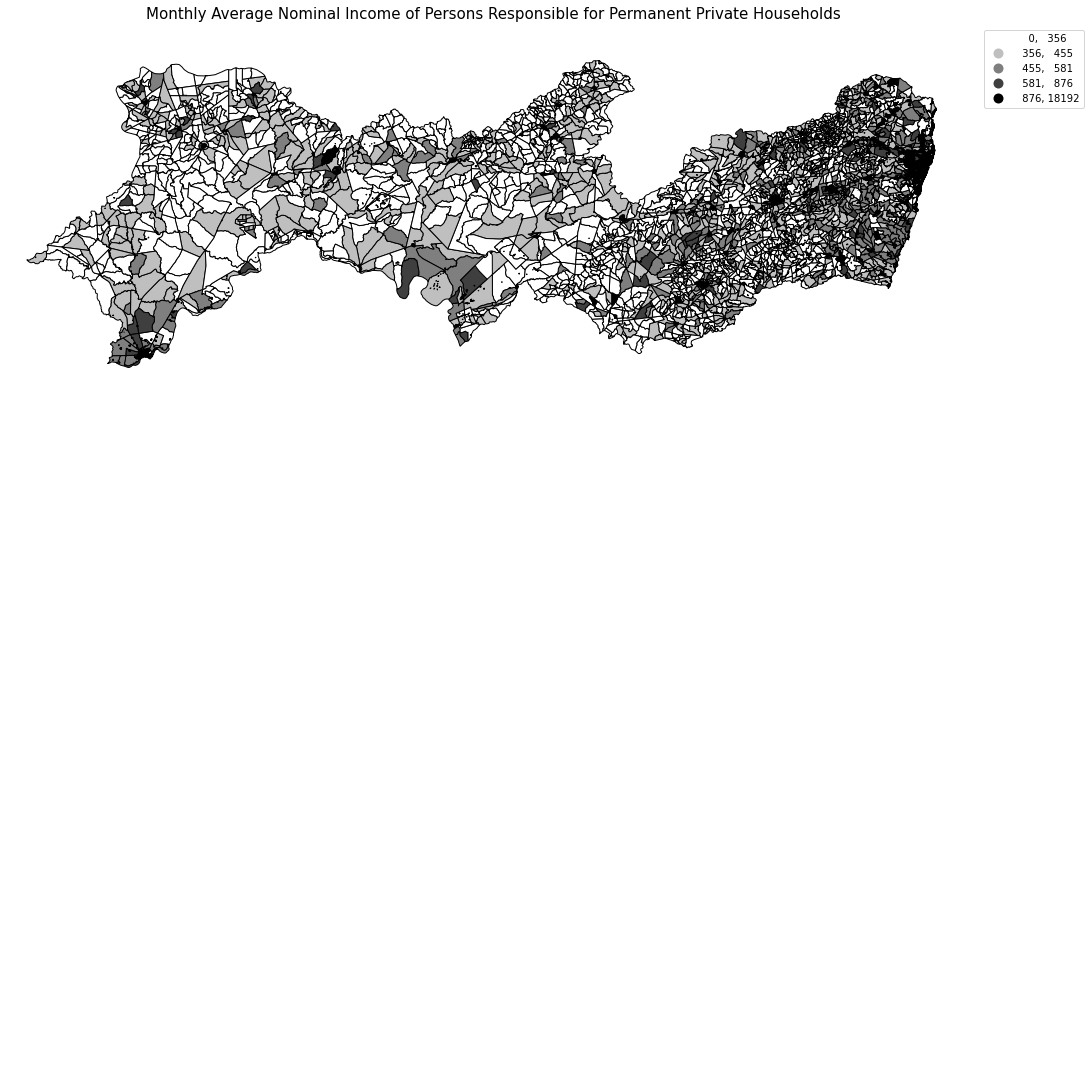

In [158]:
f, ax = plt.subplots(1,figsize=(18, 18))
merged.plot(ax=ax, column='V005', legend=True, scheme = 'Quantiles',cmap='binary', edgecolor='k',
            legend_kwds={'loc':'upper left', 'bbox_to_anchor':(1, 1), 'fmt':'{:.0f}'}),
         #, linewidth = 0.1)
ax.set_axis_off()
ax.set_title('Monthly Average Nominal Income of Persons Responsible for Permanent Private Households', fontsize = 15)
plt.axis('equal')
plt.subplots_adjust(left=0.15, bottom=0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.1) #default (left=0.125 [the left side of the subplots of the figure], bottom=0.1 [the bottom of the subplots of the figure], right=0.9 [the right side of the subplots of the figure], top=0.9[the top of the subplots of the figure], wspace=0.2[the amount of width reserved for blank space between subplots], hspace=0.2[the amount of height reserved for white space between subplots])
plt.xlim(-41.5, -34.5)
plt.ylim(-12,-9.5) 
fig.tight_layout()
plt.show()

### Census Mersh A Smaller Unit Area

In [159]:
#if someone wants a more smaller unit area map 

In [160]:
_2600054facesdelogradouros2020 = gpd.read_file('C:/Users/andre/Documents/Thesis/Thesis Project/Novas planilhas até 22-12-2020/IBGE Censo 2010 Python Parser/Malha do Setor Censiátrio/pe_faces_de_logradouros_2020/2600054_faces_de_logradouros_2020.shp')

In [161]:
_2600054facesdelogradouros2020.shape

(4291, 9)

In [162]:
_2600054facesdelogradouros2020.head(3)

,CD_SETOR,CD_QUADRA,CD_FACE,NM_TIP_LOG,NM_TIT_LOG,NM_LOG,TOT_RES,TOT_GERAL,geometry
0,260005405000001,None,None,None,None,None,None,None,"LINESTRING (-34.90133 -7.90499, -34.90096 -7.9..."
1,260005405000001,None,None,None,None,None,None,None,"LINESTRING (-34.90096 -7.90498, -34.90095 -7.9..."
2,260005405000001,None,None,None,None,None,None,None,"LINESTRING (-34.90128 -7.90580, -34.90133 -7.9..."


In [163]:
_2600054facesdelogradouros2020['CD_SETOR'].unique()

array(['260005405000001', '260005405000002', '260005405000003',
       '260005405000004', '260005405000005', '260005405000006',
       '260005405000007', '260005405000009', '260005405000011',
       '260005405000012', '260005405000013', '260005405000014',
       '260005405000015', '260005405000016', '260005405000017',
       '260005405000018', '260005405000020', '260005405000021',
       '260005405000022', '260005405000023', '260005405000024',
       '260005405000025', '260005405000027', '260005405000028',
       '260005405000029', '260005405000031', '260005405000032',
       '260005405000033', '260005405000037', '260005405000038',
       '260005405000039', '260005405000040', '260005405000041',
       '260005405000043', '260005405000045', '260005405000046',
       '260005405000047', '260005405000049', '260005405000050',
       '260005405000051', '260005405000053', '260005405000054',
       '260005405000055', '260005405000056', '260005405000057',
       '260005405000058', '2600054050000

In [164]:
_2600054facesdelogradouros2020['geometry'].unique()

<GeometryArray>
 ...
Length: 4291, dtype: geometry

In [165]:
Basico_PE_merge_pe_censusmersh.head(3)

,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,geometry,_merge
0,260005405000001,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,211.0,724.0,3.43,2.24,452.80,369490.04,764.32,385725.20,322.30,266389.59,693.75,315881.23,22491,260005405000001,URBANO,260005405006,Centro,26000540500,None,260005405,ABREU E LIMA,2600054,ABREU E LIMA,RECIFE,METROPOLITANA DE RECIFE,"POLYGON ((-34.89797 -7.90403, -34.89820 -7.904...",both
1,260005405000002,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,223.0,750.0,3.36,2.11,632.62,260188.28,727.19,230159.08,386.56,229024.17,686.42,200776.62,22492,260005405000002,URBANO,260005405006,Centro,26000540500,None,260005405,ABREU E LIMA,2600054,ABREU E LIMA,RECIFE,METROPOLITANA DE RECIFE,"POLYGON ((-34.89821 -7.90418, -34.89793 -7.904...",both
2,260005405000003,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,140.0,417.0,2.98,2.12,973.50,1573094.48,1117.13,1645327.64,623.45,958614.38,1005.48,1162765.85,22493,260005405000003,URBANO,260005405006,Centro,26000540500,None,260005405,ABREU E LIMA,2600054,ABREU E LIMA,RECIFE,METROPOLITANA DE RECIFE,"POLYGON ((-34.90205 -7.90740, -34.90192 -7.907...",both


In [166]:
Basico_PE_merge_pe_censusmersh[Basico_PE_merge_pe_censusmersh['Cod_setor']==260005405000001]

,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,geometry,_merge
0,260005405000001,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,211.0,724.0,3.43,2.24,452.8,369490.04,764.32,385725.2,322.3,266389.59,693.75,315881.23,22491,260005405000001,URBANO,260005405006,Centro,26000540500,None,260005405,ABREU E LIMA,2600054,ABREU E LIMA,RECIFE,METROPOLITANA DE RECIFE,"POLYGON ((-34.89797 -7.90403, -34.89820 -7.904...",both


In [167]:
codsetor1 = Basico_PE_merge_pe_censusmersh[Basico_PE_merge_pe_censusmersh['Cod_setor']==260005405000001]

In [168]:
_2600054facesdelogradouros2020.head(3)

,CD_SETOR,CD_QUADRA,CD_FACE,NM_TIP_LOG,NM_TIT_LOG,NM_LOG,TOT_RES,TOT_GERAL,geometry
0,260005405000001,None,None,None,None,None,None,None,"LINESTRING (-34.90133 -7.90499, -34.90096 -7.9..."
1,260005405000001,None,None,None,None,None,None,None,"LINESTRING (-34.90096 -7.90498, -34.90095 -7.9..."
2,260005405000001,None,None,None,None,None,None,None,"LINESTRING (-34.90128 -7.90580, -34.90133 -7.9..."


In [169]:
_2600054facesdelogradouros2020[_2600054facesdelogradouros2020['CD_SETOR']=='260005405000001']

,CD_SETOR,CD_QUADRA,CD_FACE,NM_TIP_LOG,NM_TIT_LOG,NM_LOG,TOT_RES,TOT_GERAL,geometry
0,260005405000001,None,None,None,None,None,None,None,"LINESTRING (-34.90133 -7.90499, -34.90096 -7.9..."
1,260005405000001,None,None,None,None,None,None,None,"LINESTRING (-34.90096 -7.90498, -34.90095 -7.9..."
2,260005405000001,None,None,None,None,None,None,None,"LINESTRING (-34.90128 -7.90580, -34.90133 -7.9..."
3,260005405000001,001,001,None,None,None,0,7,"LINESTRING (-34.90202 -7.90495, -34.90148 -7.9..."
4,260005405000001,001,002,None,None,None,4,14,"LINESTRING (-34.90145 -7.90579, -34.90148 -7.9..."
5,260005405000001,001,003,None,None,None,3,11,"LINESTRING (-34.90204 -7.90577, -34.90145 -7.9..."
6,260005405000001,001,004,None,None,None,4,17,"LINESTRING (-34.90204 -7.90577, -34.90202 -7.9..."
7,260005405000001,003,001,None,None,None,1,12,"LINESTRING (-34.90051 -7.90514, -34.90091 -7.9..."
8,260005405000001,003,002,None,None,None,7,11,"LINESTRING (-34.90055 -7.90586, -34.90056 -7.9..."
9,260005405000001,003,004,None,None,None,9,10,"LINESTRING (-34.90091 -7.90507, -34.90090 -7.9..."


In [170]:
codsetor1linestring = _2600054facesdelogradouros2020[_2600054facesdelogradouros2020['CD_SETOR']=='260005405000001']

In [171]:
codsetor1['Cod_setor'].dtype

dtype('int64')

In [172]:
codsetor1['Cod_setor'] = codsetor1['Cod_setor'].astype('str')

<ipython-input-172-830f8a67bb35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  codsetor1['Cod_setor'] = codsetor1['Cod_setor'].astype('str')


In [173]:
codsetor1linestring['CD_SETOR'].dtype

dtype('O')

In [174]:
codsetor1_codsetor1linestring = codsetor1.merge(codsetor1linestring, left_on='Cod_setor', right_on='CD_SETOR', how='inner', indicator='_merge2')

In [175]:
codsetor1_codsetor1linestring

,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012,ID,CD_GEOCODI,TIPO,CD_GEOCODB,NM_BAIRRO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,geometry_x,_merge,CD_SETOR,CD_QUADRA,CD_FACE,NM_TIP_LOG,NM_TIT_LOG,NM_LOG,TOT_RES,TOT_GERAL,geometry_y,_merge2
0,260005405000001,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,211.0,724.0,3.43,2.24,452.8,369490.04,764.32,385725.2,322.3,266389.59,693.75,315881.23,22491,260005405000001,URBANO,260005405006,Centro,26000540500,None,260005405,ABREU E LIMA,2600054,ABREU E LIMA,RECIFE,METROPOLITANA DE RECIFE,"POLYGON ((-34.89797 -7.90403, -34.89820 -7.904...",both,260005405000001,None,None,None,None,None,None,None,"LINESTRING (-34.90133 -7.90499, -34.90096 -7.9...",both
1,260005405000001,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,211.0,724.0,3.43,2.24,452.8,369490.04,764.32,385725.2,322.3,266389.59,693.75,315881.23,22491,260005405000001,URBANO,260005405006,Centro,26000540500,None,260005405,ABREU E LIMA,2600054,ABREU E LIMA,RECIFE,METROPOLITANA DE RECIFE,"POLYGON ((-34.89797 -7.90403, -34.89820 -7.904...",both,260005405000001,None,None,None,None,None,None,None,"LINESTRING (-34.90096 -7.90498, -34.90095 -7.9...",both
2,260005405000001,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,211.0,724.0,3.43,2.24,452.8,369490.04,764.32,385725.2,322.3,266389.59,693.75,315881.23,22491,260005405000001,URBANO,260005405006,Centro,26000540500,None,260005405,ABREU E LIMA,2600054,ABREU E LIMA,RECIFE,METROPOLITANA DE RECIFE,"POLYGON ((-34.89797 -7.90403, -34.89820 -7.904...",both,260005405000001,None,None,None,None,None,None,None,"LINESTRING (-34.90128 -7.90580, -34.90133 -7.9...",both
3,260005405000001,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,211.0,724.0,3.43,2.24,452.8,369490.04,764.32,385725.2,322.3,266389.59,693.75,315881.23,22491,260005405000001,URBANO,260005405006,Centro,26000540500,None,260005405,ABREU E LIMA,2600054,ABREU E LIMA,RECIFE,METROPOLITANA DE RECIFE,"POLYGON ((-34.89797 -7.90403, -34.89820 -7.904...",both,260005405000001,001,001,None,None,None,0,7,"LINESTRING (-34.90202 -7.90495, -34.90148 -7.9...",both
4,260005405000001,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,211.0,724.0,3.43,2.24,452.8,369490.04,764.32,385725.2,322.3,266389.59,693.75,315881.23,22491,260005405000001,URBANO,260005405006,Centro,26000540500,None,260005405,ABREU E LIMA,2600054,ABREU E LIMA,RECIFE,METROPOLITANA DE RECIFE,"POLYGON ((-34.89797 -7.90403, -34.89820 -7.904...",both,260005405000001,001,002,None,None,None,4,14,"LINESTRING (-34.90145 -7.90579, -34.90148 -7.9...",both
5,260005405000001,2,Região Nordeste,PE,Pernambuco,2605,Metropolitana de Recife,26017,Recife,11,RM Recife,2600054,ABREU E LIMA,260005405,ABREU E LIMA,26000540500,ABREU E LIMA,2600054006,Centro,1,0,211.0,724.0,3.43,2.24,452.8,369490.04,764.32,385725.2,322.3,266389.59,693.75,315881.23,22491,260005405000001,URBANO,260005405006,Centro,26000540500,None,260005405,ABREU E LIMA,2600054,ABREU E LIMA,RECIFE,METROPOLITANA DE RECIFE,"POLYGON ((-34.89797 -7.90403, -34.89820 -7.904...",both,2600054050000

In [176]:
from geopandas import GeoDataFrame
codsetor1_codsetor1linestring = GeoDataFrame(codsetor1_codsetor1linestring)

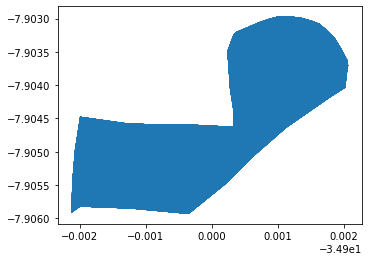

In [177]:
codsetor1_codsetor1linestring['geometry_x'].plot();

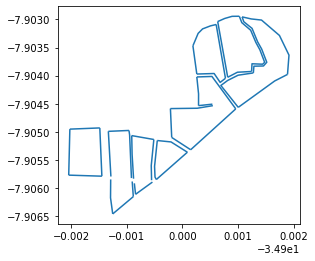

In [178]:
codsetor1_codsetor1linestring['geometry_y'].plot();

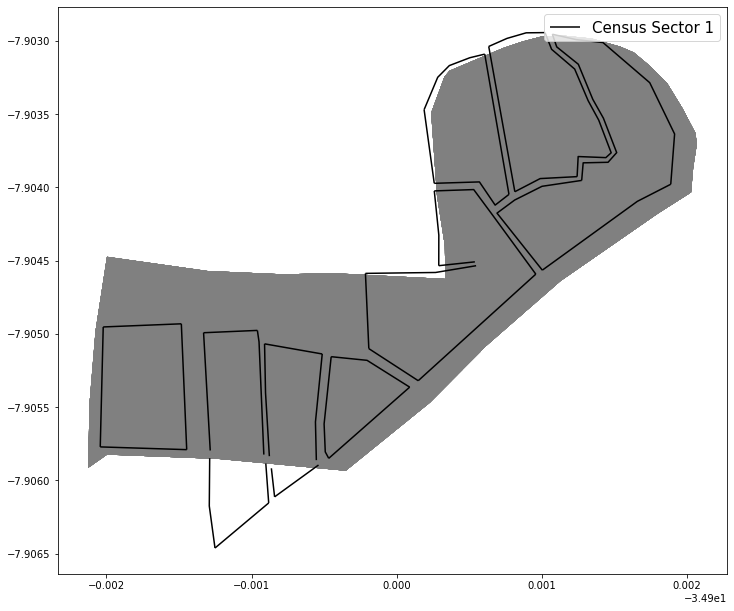

In [179]:
fig, ax = plt.subplots(figsize=(12,12))
codsetor1_codsetor1linestring['geometry_x'].plot(ax=ax, alpha=0.4, color='grey')
codsetor1_codsetor1linestring['geometry_y'].plot(ax=ax,
                                         markersize=20,
                                         color = 'black',
                                         marker='o',
                                         label='Census Sector 1')
plt.legend(prop={'size': 15});

For other [matplotlib markers](https://matplotlib.org/3.1.1/api/markers_api.html) and for other map [options](https://plotly.com/python/lines-on-mapbox/).

In [180]:
#Feel free to do more detailed maps with linestrings over shapefiles

In [181]:
#Thanks for going through the code, I hope it helped you somehow